In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%matplotlib inline
%pylab
%config InlineBackend.figure_format = 'retina'

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


# Parte I: Exploración, limpieza, selección de variables, entre otros.

En esta sección se realiza la preparación de los datos. Limpieza del dataframe por valores nulos, renombrado de variables, cálculo de nuevas variables, descarte de variables que no forman parte de análisis, entre otros.

## Analisis exploratorio

In [2]:
data = pd.read_csv('../Nuevas_variables/v7/input_extendido.csv')
data.head(10)

,Unnamed: 0,Date,Year,Season,local_team,visitor_team,Points,Opponent_Points,Result,LOCAL_Racha,...,local_played_visitor,visitor_played_visitor,visitor_played_local,place_local_played,place_visitor_played,avg_distance_place_visitor_played,avg_distance_place_local_played,distance_between_stadiums,distance_local_traveled,distance_visitor_traveled
0,0,Oct 30,2015,2016,Philadelphia 76ers,Utah Jazz,71,99,0,-1,...,1,1,0,Boston Celtics,Detroit Pistons,313.5,822.000000,2964.0,1644.0,627.0
1,1,Nov 2,2015,2016,Philadelphia 76ers,Cleveland Cavaliers,100,107,0,-2,...,0,0,1,Philadelphia 76ers,Cleveland Cavaliers,488.0,0.000000,1464.0,0.0,1464.0
2,2,Nov 7,2015,2016,Philadelphia 76ers,Orlando Magic,97,105,0,-5,...,1,0,1,Cleveland Cavaliers,Orlando Magic,1806.0,1464.000000,1806.0,1464.0,1806.0
3,3,Nov 9,2015,2016,Philadelphia 76ers,Chicago Bulls,88,111,0,-6,...,0,0,1,Philadelphia 76ers,Chicago Bulls,501.0,0.000000,1002.0,0.0,1002.0
4,4,Nov 11,2015,2016,Philadelphia 76ers,Toronto Raptors,103,119,0,-7,...,0,0,1,Philadelphia 76ers,Toronto Raptors,301.0,0.000000,301.0,0.0,301.0
5,5,Nov 16,2015,2016,Philadelphia 76ers,Dallas Mavericks,86,92,0,-10,...,1,1,0,San Antonio Spurs,Houston Rockets,285.0,3841.000000,314.0,7682.0,570.0
6,6,Nov 18,2015,2016,Philadelphia 76ers,Indiana Pacers,85,112,0,-11,...,0,1,0,Philadelphia 76ers,Chicago Bulls,501.0,0.000000,990.0,0.0,1002.0
7,7,Dec 1,2015,2016,Philadelphia 76ers,Los Angeles Lakers,103,91,0,-18,...,1,0,1,Memphis Grizzlies,Los Angeles Lakers,2003.0,135.500000,4006.0,271.0,4006.0
8,8,Dec 5,2015,2016,Philadelphia 76ers,Denver Nuggets,105,108,0,-1,...,1,1,0,New York Knicks,Toronto Raptors,150.5,135.666667,1349.0,407.0,301.0
9,9,Dec 7,2015,2016,Philadelphia 76ers,San Antonio Spurs,68,119,0,-2,...,0,0,1,Philadelphia 76ers,San Antonio Spurs,3841.0,0.000000,7682.0,0.0,7682.0


In [3]:
print("Totalidad de datos del .csv: " + str(len(data)))
data = data.dropna()
print("Totalidad de datos post drop NAN: " + str(len(data)))
print("Total de variables: "+ str(len(data.columns)))

Totalidad de datos del .csv: 6220
Totalidad de datos post drop NAN: 5891
Total de variables: 180


In [4]:
for column in data.columns:
    print(column)

Unnamed: 0
Date
Year
Season
local_team
visitor_team
Points
Opponent_Points
Result
LOCAL_Racha
ID Partido
LOCAL_Ultimos10Victorias
LOCAL_Ultimos10Derrotas
VISITANTE_Ultimos10Victorias
VISITANTE_Ultimos10Derrotas
VISITANTE_Racha
local_Conf_position
local_Win
local_Lose
local_Percentagewl
local_Dif_leader
local_Home_win
local_Home_lose
local_Away_win
local_Away_lose
local_Div_win
local_Div_lose
local_Cnf_win
local_Cnf_lose
local_Icf_win
local_Icf_lose
visitor_Conf_position
visitor_Win
visitor_Lose
visitor_Percentagewl
visitor_Dif_leader
visitor_Home_win
visitor_Home_lose
visitor_Away_win
visitor_Away_lose
visitor_Div_win
visitor_Div_lose
visitor_Cnf_win
visitor_Cnf_lose
visitor_Icf_win
visitor_Icf_lose
local_fg
local_fga
local_fg3
local_fg3a
local_ft
local_fta
local_orb
local_drb
local_trb
local_ast
local_stl
local_blk
local_tov
local_pf
local_pts
local_ft_pct
local_fg_pct
local_fg3_pct
visitor_fg
visitor_fga
visitor_fg3
visitor_fg3a
visitor_ft
visitor_fta
visitor_orb
visitor_drb
visitor_

## Calculo de variables compuestas

Indicar en el estudio la seleccion de variables por logica del modelo, y comentar aquellas observadas en estudios previos que no tienen ningun sentido incluir

Por ejemplo la ilogica inclusion de la diferencia_visitante_point observado en estudios previos

In [5]:
# Código comentado post a los arreglos 
data["Result1"] = 1

data["Result1"] = np.where(data["Opponent_Points"] > data["Points"], 0, 1)

data.rename(columns={'Result1': 'target'}, inplace=True)

#################################################################################
# data.rename(columns={'Result': 'target'}, inplace=True) Cuando se arreglen los errores del .csv (Result = 0 all rows)

In [6]:

data['local_visitor_dif_pts'] = data['local_pts'] - data['visitor_pts']

data['LOCAL_porcentaje_victoria_Ultimos10'] = (data['LOCAL_Ultimos10Victorias']) / (data['LOCAL_Ultimos10Victorias'] + data['LOCAL_Ultimos10Derrotas'])
data['VISITANTE_porcentaje_victoria_Ultimos10'] = (data['VISITANTE_Ultimos10Victorias']) / (data['VISITANTE_Ultimos10Victorias'] + data['VISITANTE_Ultimos10Derrotas'])


data['LOCAL_porcentaje_victoria_LOCAL'] = (data['local_Home_win']) / (data['local_Home_win'] + data['local_Home_lose'])
data['VISITANTE_porcentaje_victoria_VISITANTE'] = (data['visitor_Home_win']) / (data['visitor_Home_win'] + data['visitor_Home_lose'])


data = data.dropna()
len(data) 
print("Totalidad de datos post cálculo de varaibles compuestas: " + str(len(data)))

Totalidad de datos post cálculo de varaibles compuestas: 5809


## Transformacion de variables categoricas

Estrictamente necesario transformar las variables categoricas para modelar con las librerias de Python que estamos utilizando.

Distintos enfoques para trabajar variables categoricas: [pbpython.com](https://pbpython.com/categorical-encoding.html)

Trabajar con variables categoricas en Machine Learning: [machinelearningmastery.com](https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/)

In [7]:
data = pd.get_dummies(data, columns=['Local_Conferencia', 'Local_Division'],
               prefix=['Conf_local', 'Div_local'])

data = pd.get_dummies(data, columns=['Visitor_Conferencia', 'Visitor_Division'],
               prefix=['Conf_visitor', 'Div_visitor'])

data.rename(columns={'Div_local_Atlantic Division':'Div_local_Atlantic',
                    'Div_local_Central Division': 'Div_local_Central',
                    'Div_local_Northwest Division': 'Div_local_Northwest',
                    'Div_local_Pacific Division': 'Div_local_Pacific',
                    'Div_local_Southeast Division': 'Div_local_Southeast',
                    'Div_local_Southwest Division': 'Div_local_Southwest'},inplace=True)

data.rename(columns={'Div_visitor_Atlantic Division':'Div_visitor_Atlantic',
                    'Div_visitor_Central Division': 'Div_visitor_Central',
                    'Div_visitor_Northwest Division': 'Div_visitor_Northwest',
                    'Div_visitor_Pacific Division': 'Div_visitor_Pacific',
                    'Div_visitor_Southeast Division': 'Div_visitor_Southeast',
                    'Div_visitor_Southwest Division': 'Div_visitor_Southwest'},inplace=True)

In [8]:
# Seleccion de variables para análisis de correlación

local = []
def filter_local_name(name):
    if 'Local' in name:
      return name
    if 'LOCAL' in name:
        return name
    if 'local' in name:
        return name
    
for variable in data.columns:
    if (filter_local_name(variable) != None):
        local.append(variable)
#print(local) Solo es necesario el print() para copiar/pegar las variables.

## Seleccion de Variables: Matriz de Correlación

In [9]:
#Copiamos y pegamos el output del código anterior, incluyendo ahora "target"

game_var_local = ['target', 'local_visitor_dif_pts', 'local_orb', 'local_drb', 'local_trb', 'local_ast',
                  'local_stl', 'local_blk', 'local_tov','local_pf',
                  'local_ft_pct', 'local_fg_pct', 'local_fg3_pct']

game_var_visitante = ['target', 'local_visitor_dif_pts', 'visitor_orb', 'visitor_drb',
                      'visitor_trb', 'visitor_ast','visitor_stl', 'visitor_blk', 'visitor_tov','visitor_pf',
                      'visitor_ft_pct', 'visitor_fg_pct', 'visitor_fg3_pct']


prev_var_local = ['target', 'LOCAL_Racha','LOCAL_porcentaje_victoria_Ultimos10', 'local_Percentagewl',
                  'LOCAL_porcentaje_victoria_LOCAL','local_Conf_position','local_Dif_leader','Sueldo local',
                  
                  'local_dif_between_previous_game', 'local_played_local', 
                  'local_played_visitor', 'avg_distance_place_local_played',
                  'distance_between_stadiums', 'distance_local_traveled',
                  'LOCAL_AWS_MEDIO_AGRUPADO', 'LOCAL_WP_MEDIO_AGRUPADO']


prev_var_visitante = ['target', 'VISITANTE_Racha','VISITANTE_porcentaje_victoria_Ultimos10','visitor_Percentagewl',
                      'VISITANTE_porcentaje_victoria_VISITANTE','visitor_Conf_position',
                      'visitor_Dif_leader','Sueldo visitante',
                      
                      'visitor_dif_between_previous_game', 'visitor_played_local', 
                      'visitor_played_visitor', 'avg_distance_place_visitor_played',
                      'distance_between_stadiums', 'distance_visitor_traveled', 
                      'VISITOR_AWS_MEDIO_AGRUPADO', 'VISITOR_WP_MEDIO_AGRUPADO']


dummy = ['local_played_previous_date','local_played_two_days_ago','local_played_three_days_ago',
         'local_played_prorrogue_previous_date','local_played_prorrogue_two_days_ago',
         'local_played_prorrogue_three_days_ago','Conf_local_Este','Div_local_Atlantic','Div_local_Central',
         'Div_local_Northwest', 'Div_local_Pacific','Div_local_Southeast', 'Div_local_Southwest',
         
         'visitor_played_previous_date','visitor_played_two_days_ago','visitor_played_three_days_ago',
         'visitor_played_prorrogue_previous_date','visitor_played_prorrogue_two_days_ago',
         'visitor_played_prorrogue_three_days_ago', 'Conf_visitor_Este','Div_visitor_Atlantic','Div_visitor_Central',
         'Div_visitor_Northwest','Div_visitor_Pacific','Div_visitor_Southeast', 'Div_visitor_Southwest']



prev_data_local = data[prev_var_local]
prev_data_visitante = data[prev_var_visitante]

game_data_local = data[game_var_local]
game_data_visitante = data[game_var_visitante]

var_continuas = game_var_local + game_var_visitante + prev_var_local + prev_var_visitante

all_variables = var_continuas + dummy

In [10]:
all_variables = list(dict.fromkeys(all_variables)) #drop duplicates
var_continuas = list(dict.fromkeys(var_continuas)) #drop duplicates
del all_variables[0] #borramos target de la primera posicion
del var_continuas[0] #borramos target de la primera posicion

all_variables.append('target') #insertamos target en la ultima posicion
var_continuas.append('target') #insertamos target en la ultima posicion

print('Total variables continuas:  '+ str(len(var_continuas)))
print('Total variables dummy:  '+ str(len(dummy)))

Total variables continuas:  53
Total variables dummy:  26


## “Garbage in, garbage out” (variables)

Hemos filtrado variables previo al análisis de selección, se sabe a priori que unas no aportan información importante para el modelo (derivan del proceso de extracción de datos, por ejemplo) y otras que si bien tienen mucha información asociada, se han descartado porque otras variables las sustituten. 

Se denota: (local/visitante) cuando se han filtrado las variables tanto de local como de visitante

**Unnamed: 0, Date, Year, Season, ID Partido, number_date**: estas se han eliminado porque derivan del proceso de extracción de datos.

##### Variables previas al partido:

**local_Home_win, local_Home_lose, local_Win, local_Lose, local_Away_win, local_Away_lose, local_Div_win, local_Div_lose, local_Cnf_win, local_Cnf_lose, local_Icf_win, local_Icf_lose** (local/visitante): todas estas variables contemplan la misma información desde distintas perspectivas, no tiene sentido incluirlas en el análisis, a contrario, su exclusión nos permitirá concentrarnos en la esencia de la lógica del modelo, predecir el resultado de la perspectiva del local.

**LOCAL_Ultimos10Victorias', 'LOCAL_Ultimos10Derrotas**



**local_team, visitor_team**:  son variables categóricas y no aportan información necesaria para que el algoritmo aprenda a determinar cuando gana un equipo u otro. El modelo será construido siempre desde la  perspectiva lógica de los datos, es decir, desde la visión del local (sea quien sea el equipo local o visitante).



##### Variables durante al partido: (FALTA AQUI ELIMINAR LAS DE JUEGO Y SUSTITUIR POR LAS COMPUESTAS)


**local_pts, visitor_pts, Points, Opponent_Points** (local/visitante) : las primeras variables si bien soy muy importantes (puntos de ambos equipos a mitad del juego), su información ya se encuentra resumida en la variable **'local_visitor_dif_pts'**. En muchas ocasiones es recomendable construir modelos con variables en su propia naturaleza, es decir, sin construir ratios, variables compuestas, entre otros. 

Sin embargo, el propósito en este caso es que el algoritmo contemple que a mayores diferencias de puntos entre el local y el visitante a mitad del juego, mayor probabilidad de que gane el partido el local (viceversa).

Las dos últimas corresponden con los puntos del local y el visitante (oponente) al final del partido. Estas variables contienen toda la información necesaria para determinar quien es el ganador del partido, en este contexto, no es posible entrenar un algoritmo con una información que no tendrá disponible al momento de utilizarlo en un caso real. Es por ello que estamos trabajando con información disponible hasta la mitad del juego.

**local_fg, local_fga, local_fg3, local_fg3a, local_ft, local_fta** (local/visitante): información contemplada como % de aciertos en las variables **local_ft_pct, local_fg_pct, local_fg3_pct**





#### Variables Dummy:

**place_local_played, place_visitor_played, local_played_visitor, visitor_played_local:** desde la perspectiva del modelo, ningúna tiene relevancia por lógica.

**'Conf_local_Oeste'** (local/visitante): por defecto tiene colinealidad perfecta con 'Conf_local_Este'

Text(0.5, 0.98, 'Distribución de Variables de equipo LOCAL Previo al Partido')

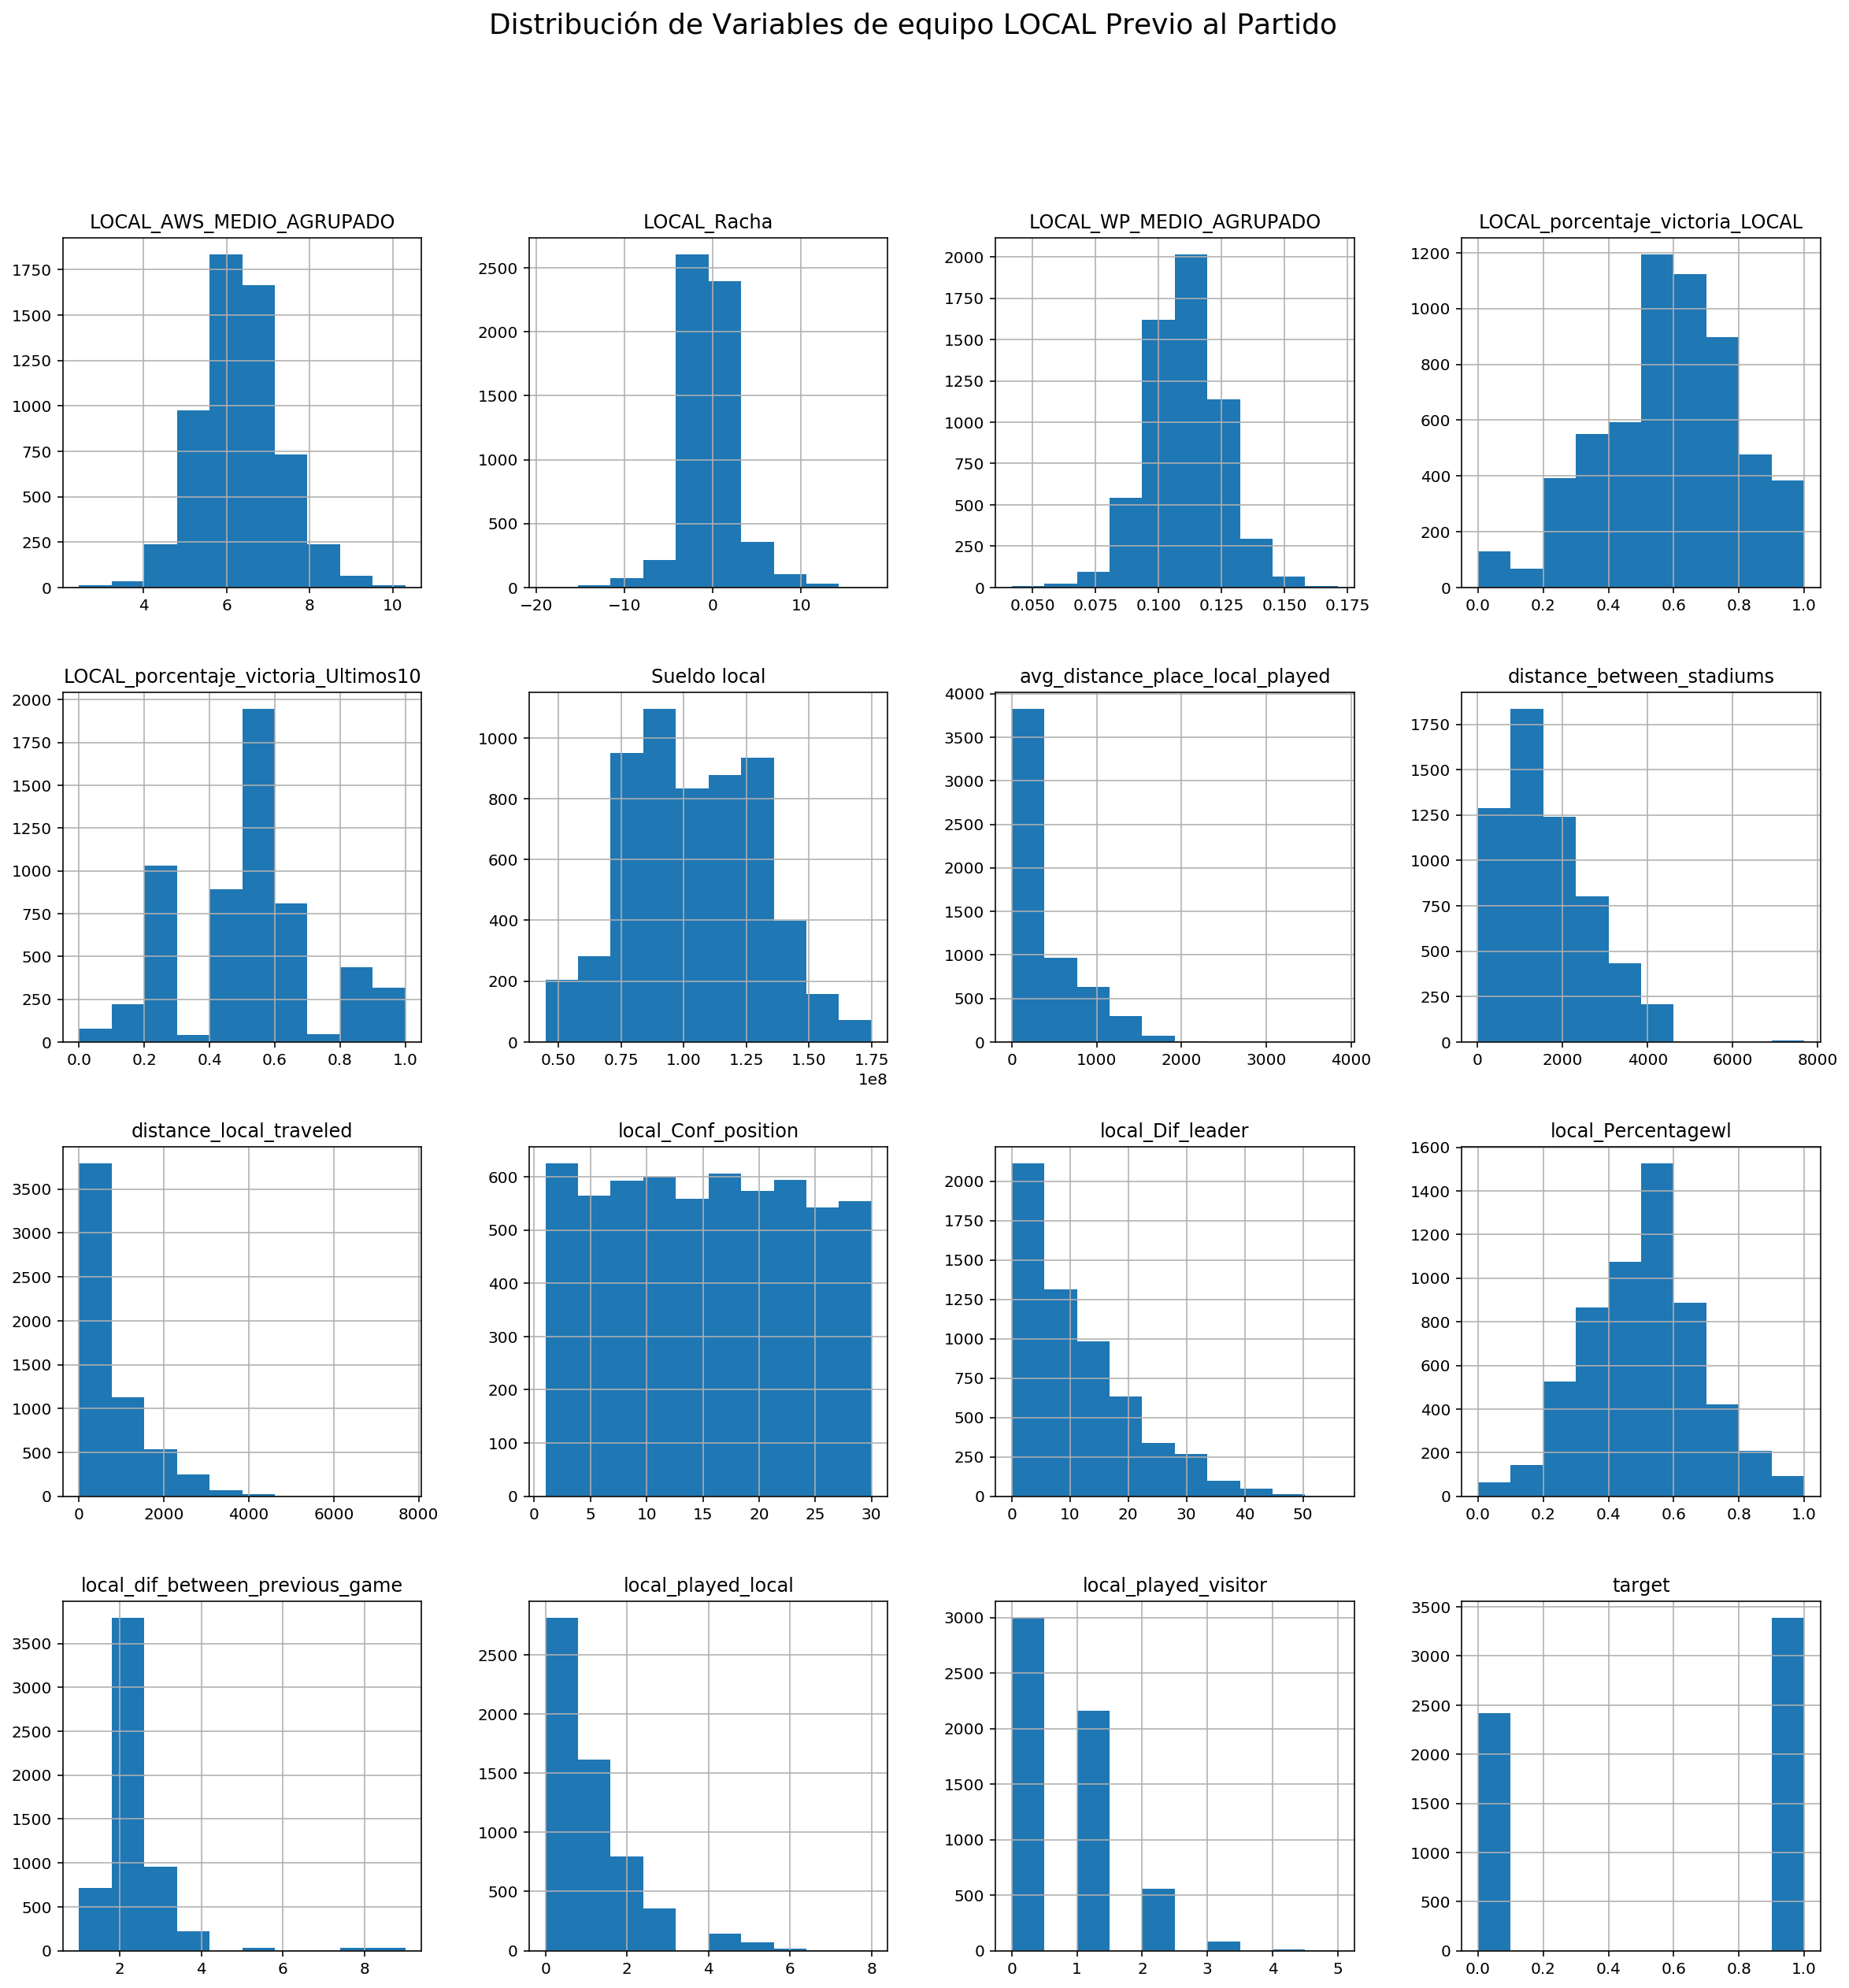

In [11]:
%matplotlib inline
prev_data_local.hist(figsize = (20, 20))
matplotlib.axes.Axes.remove
plt.suptitle('Distribución de Variables de equipo LOCAL Previo al Partido', fontsize = 18)

Text(0.5, 0.98, 'Distribución de Variables de equipo LOCAL a Mitad del Partido')

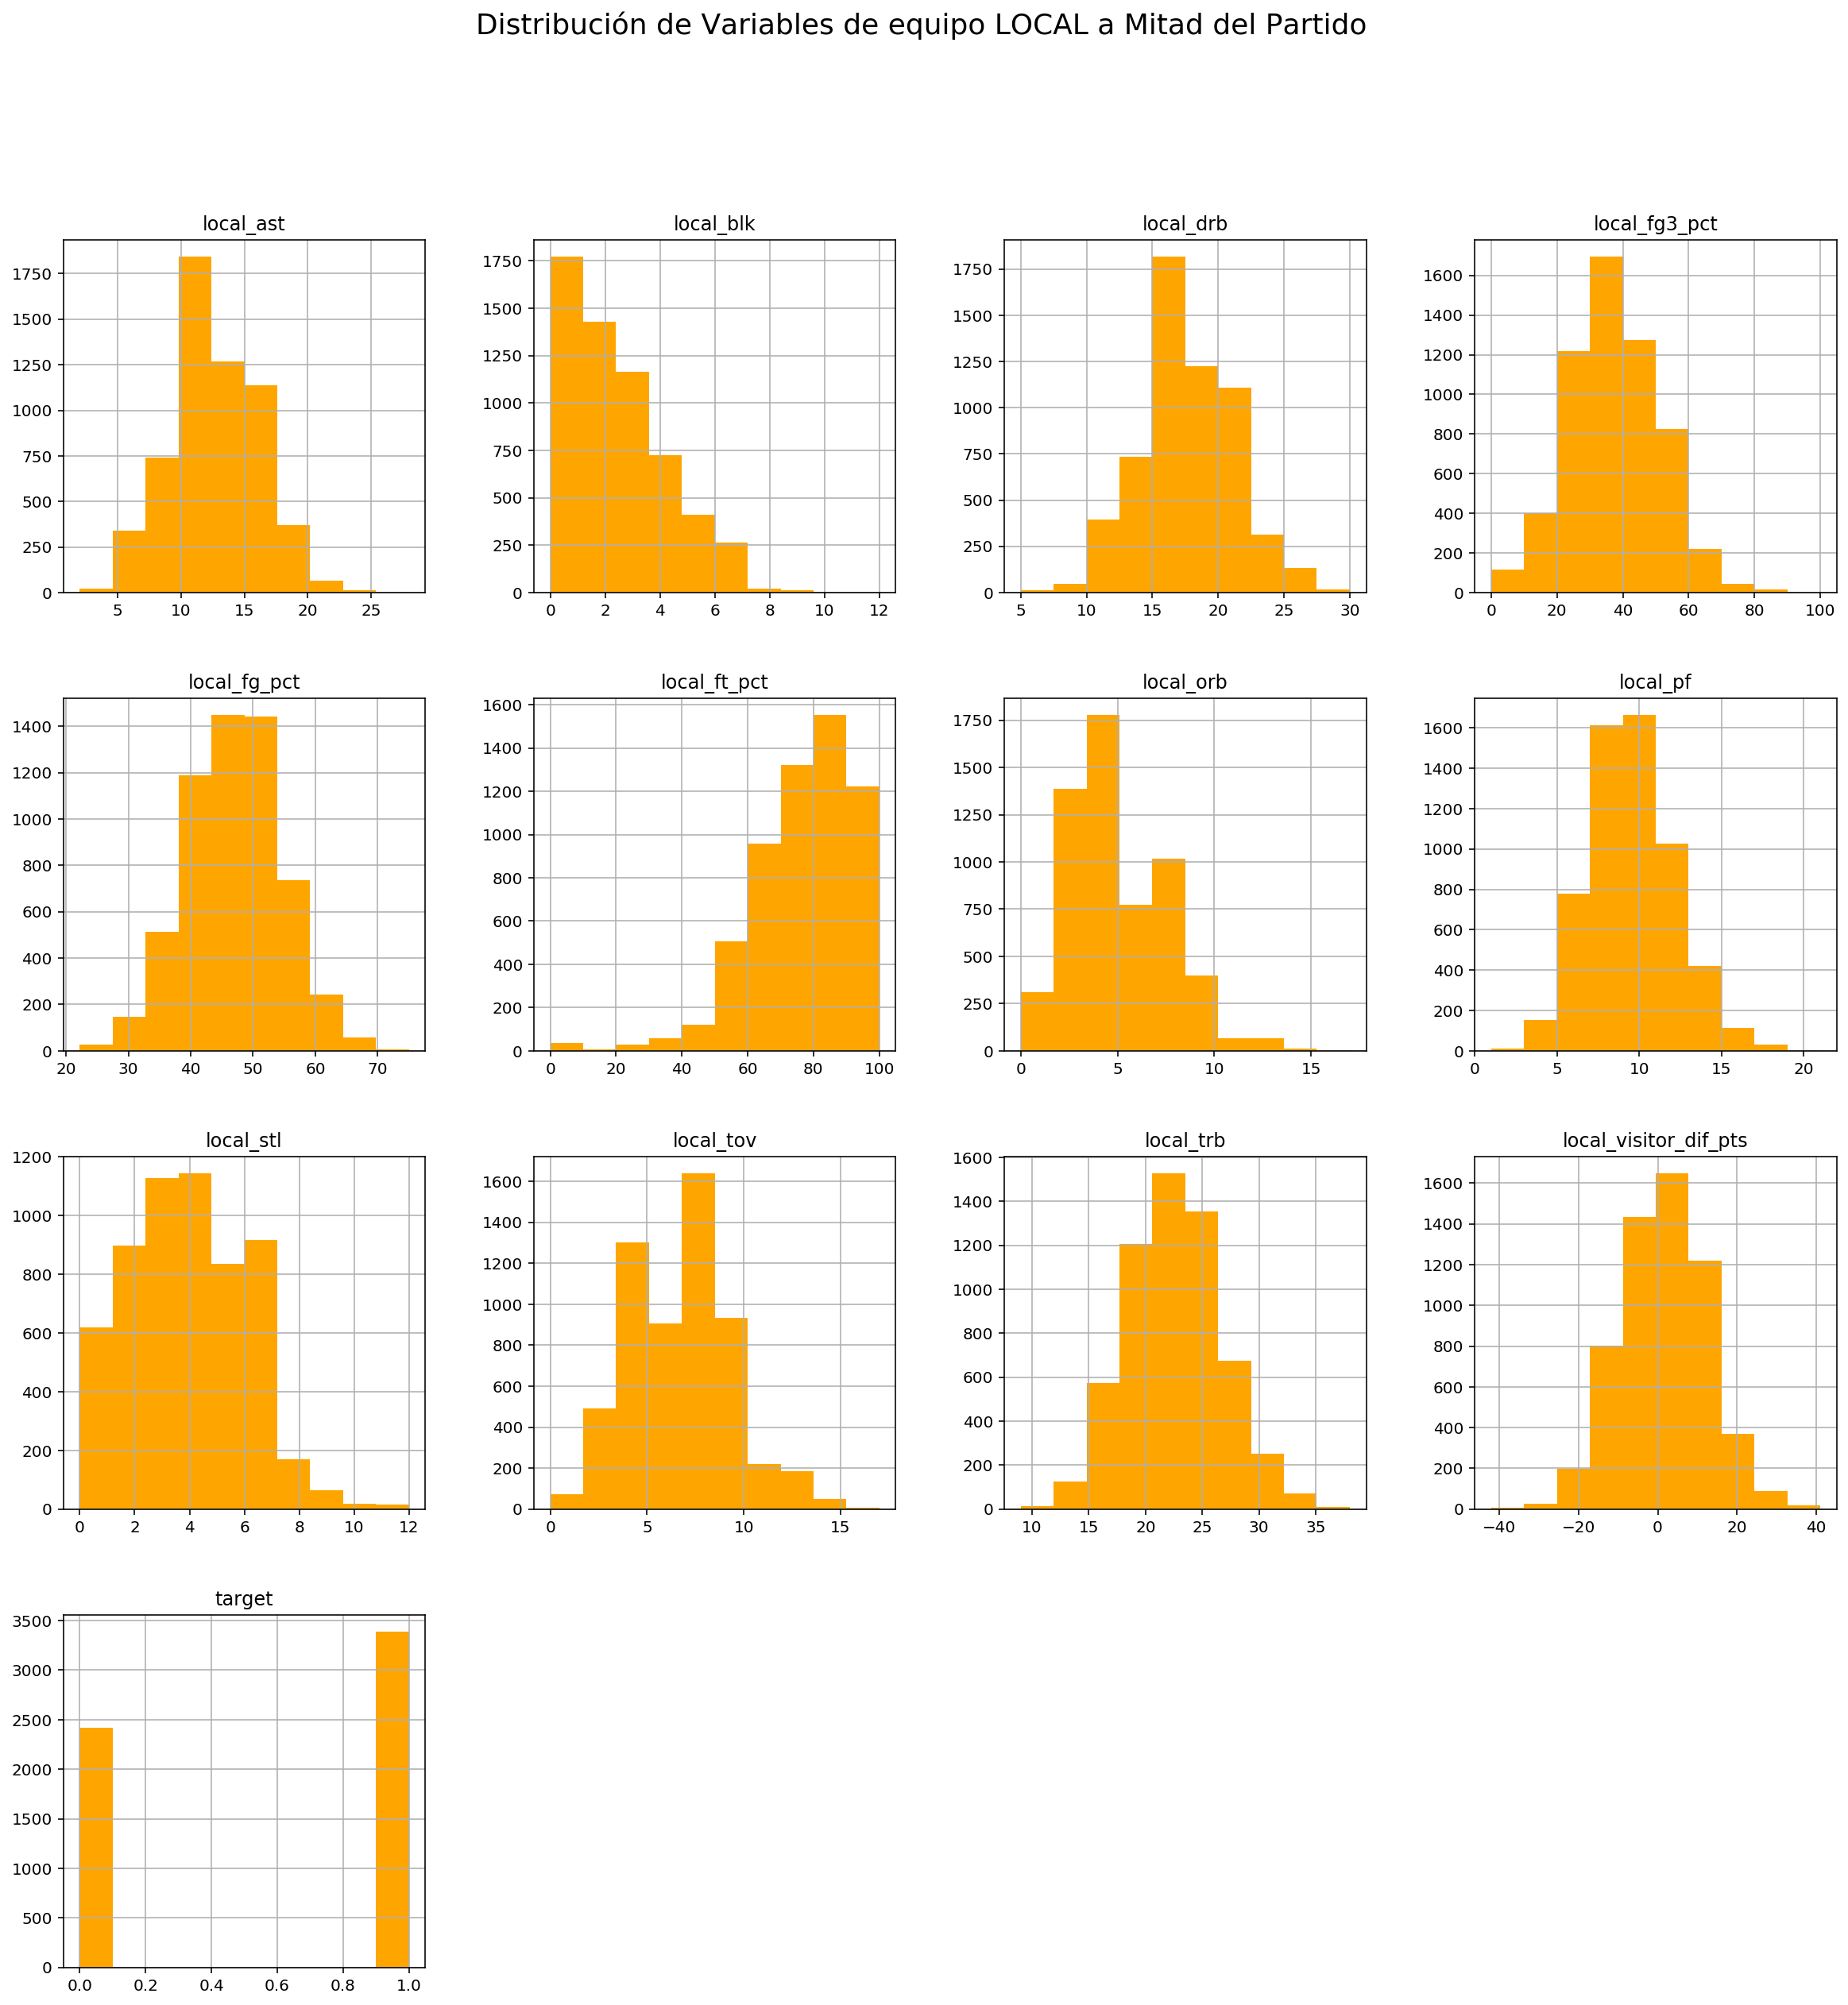

In [12]:
%matplotlib inline
game_data_local.hist(figsize = (20, 20), color="orange")
matplotlib.axes.Axes.remove
plt.suptitle('Distribución de Variables de equipo LOCAL a Mitad del Partido', fontsize = 18)

Text(0.5, 1, 'Matriz de Correlación Previo al Partido LOCAL')

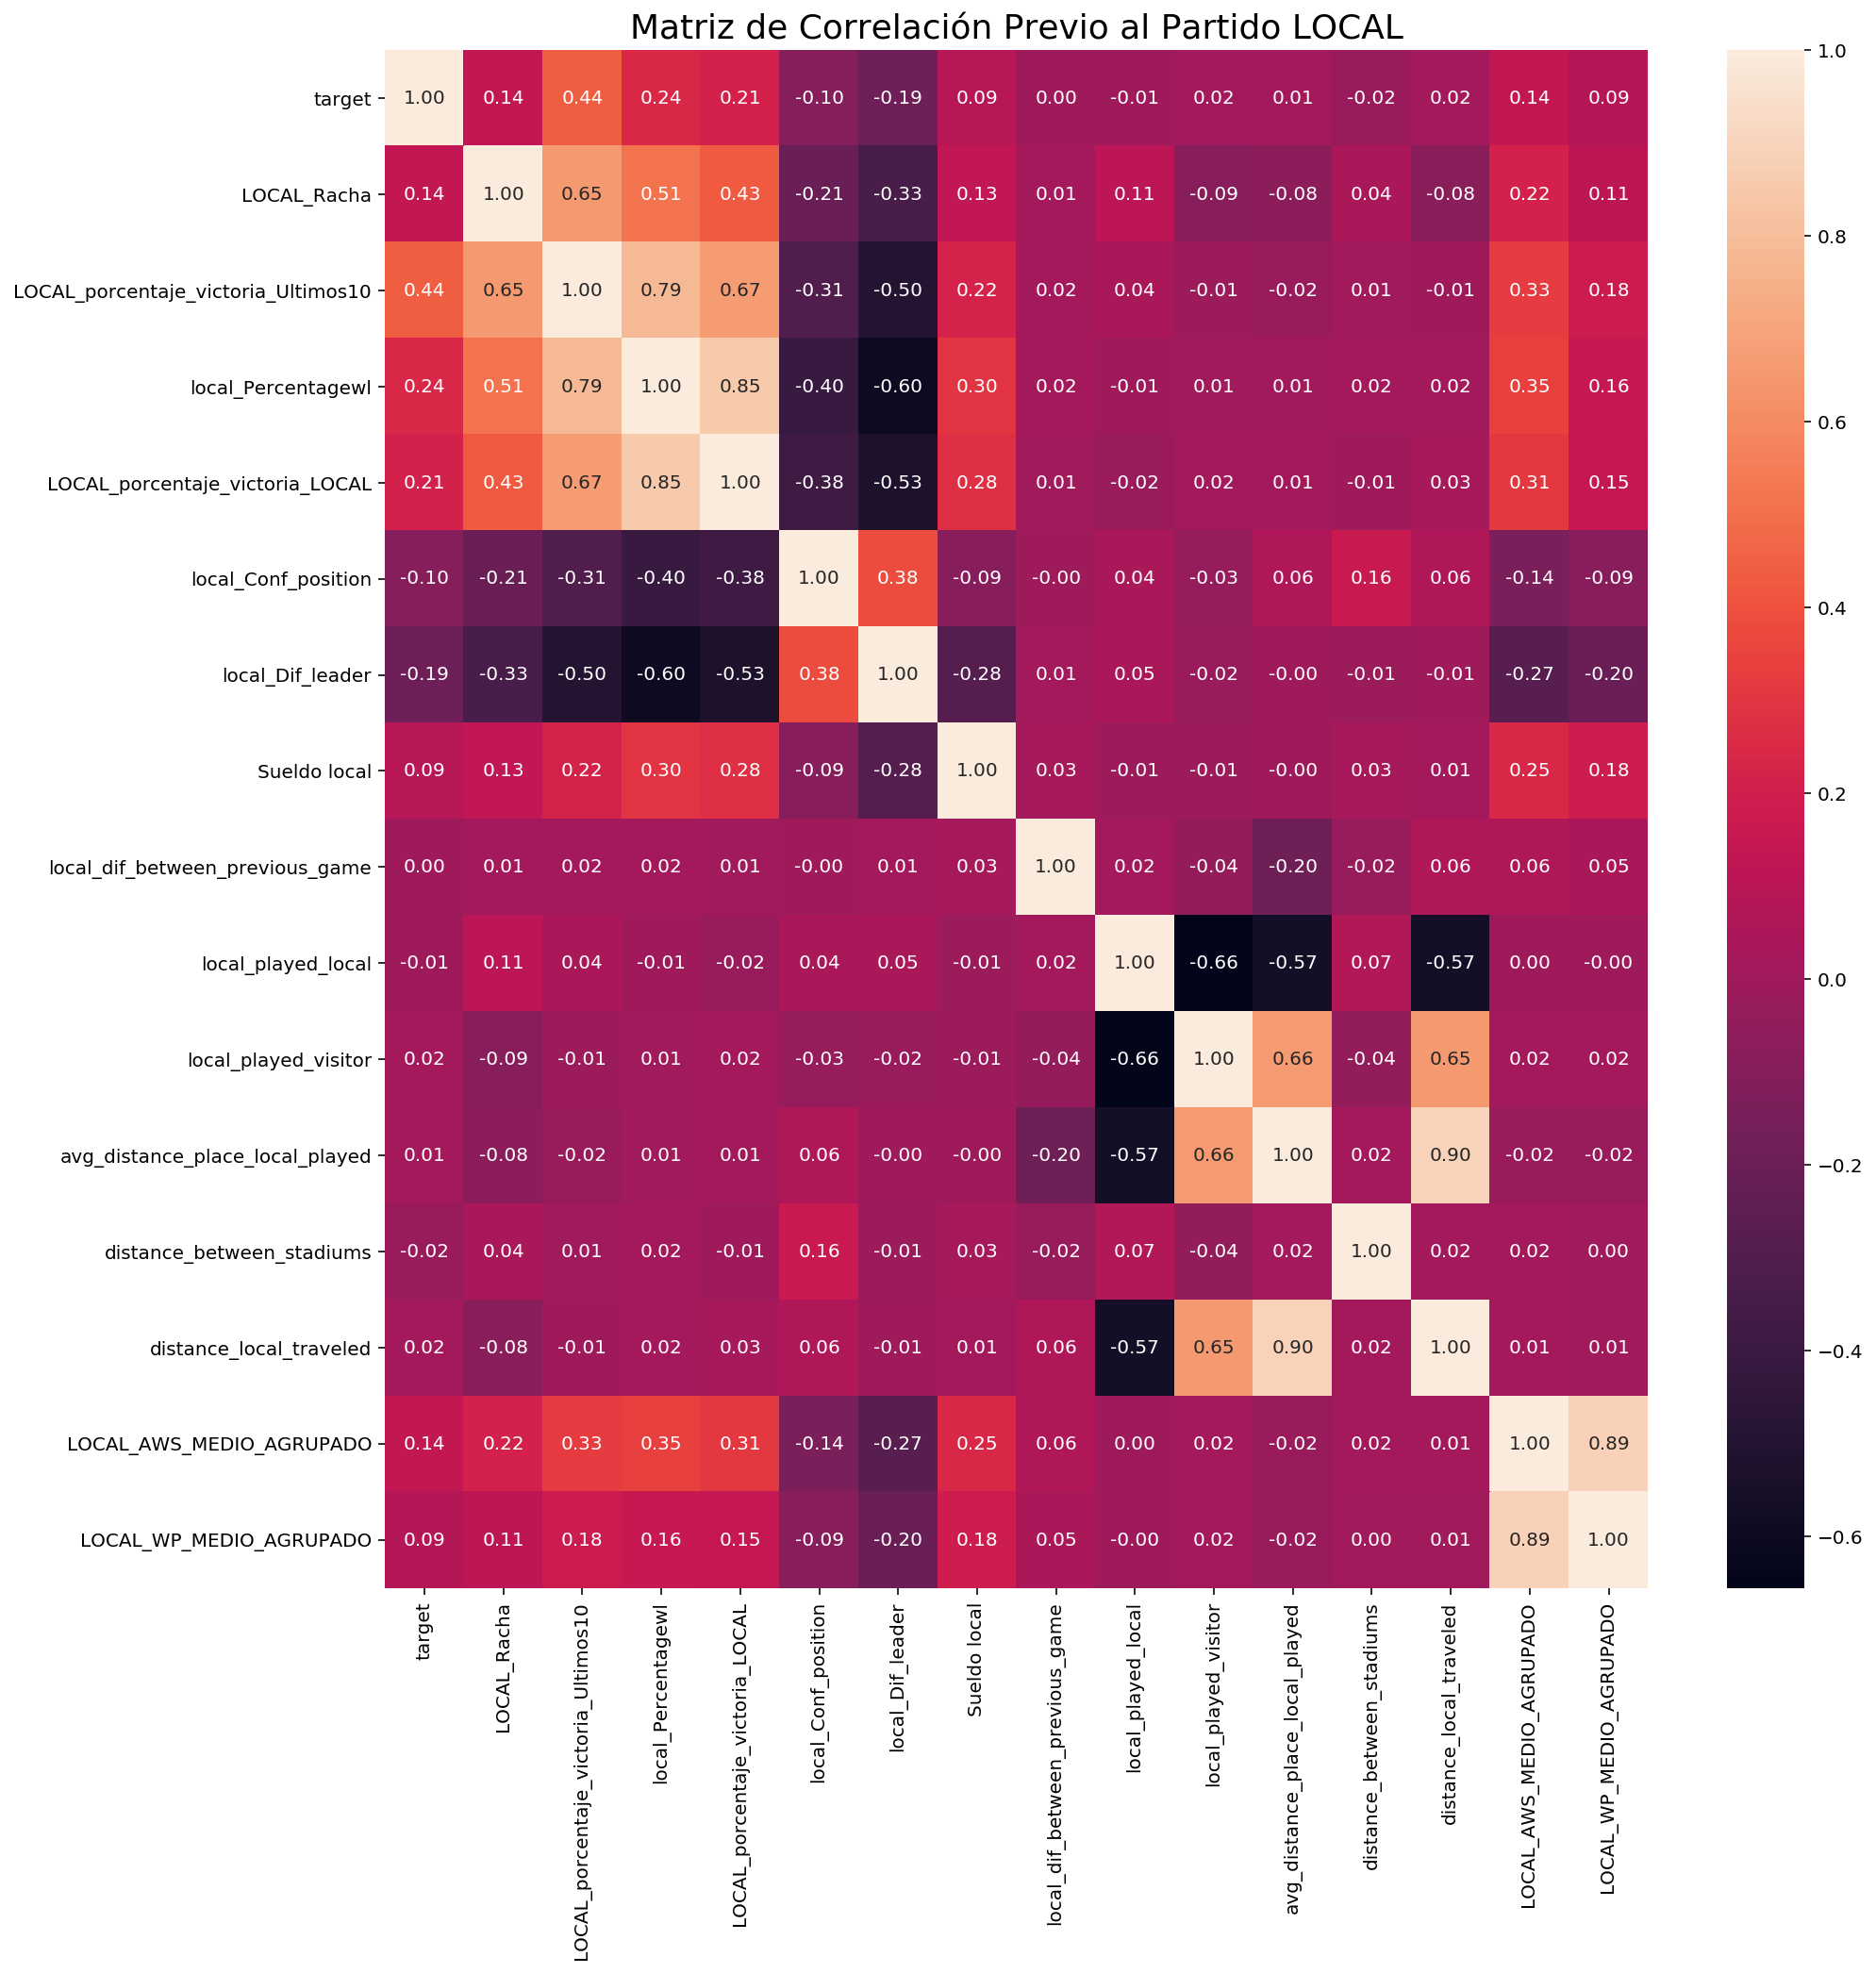

In [13]:
%matplotlib inline
# Heatmap PREV LOCAL
import seaborn as sns
plt.figure(figsize=(15, 15))
sns = sns.heatmap(prev_data_local.corr(), annot=True, fmt='.2f')
sns.set_title('Matriz de Correlación Previo al Partido LOCAL', fontsize=18)

Text(0.5, 1, 'Matriz de Correlación Previo al Partido VISITANTE')

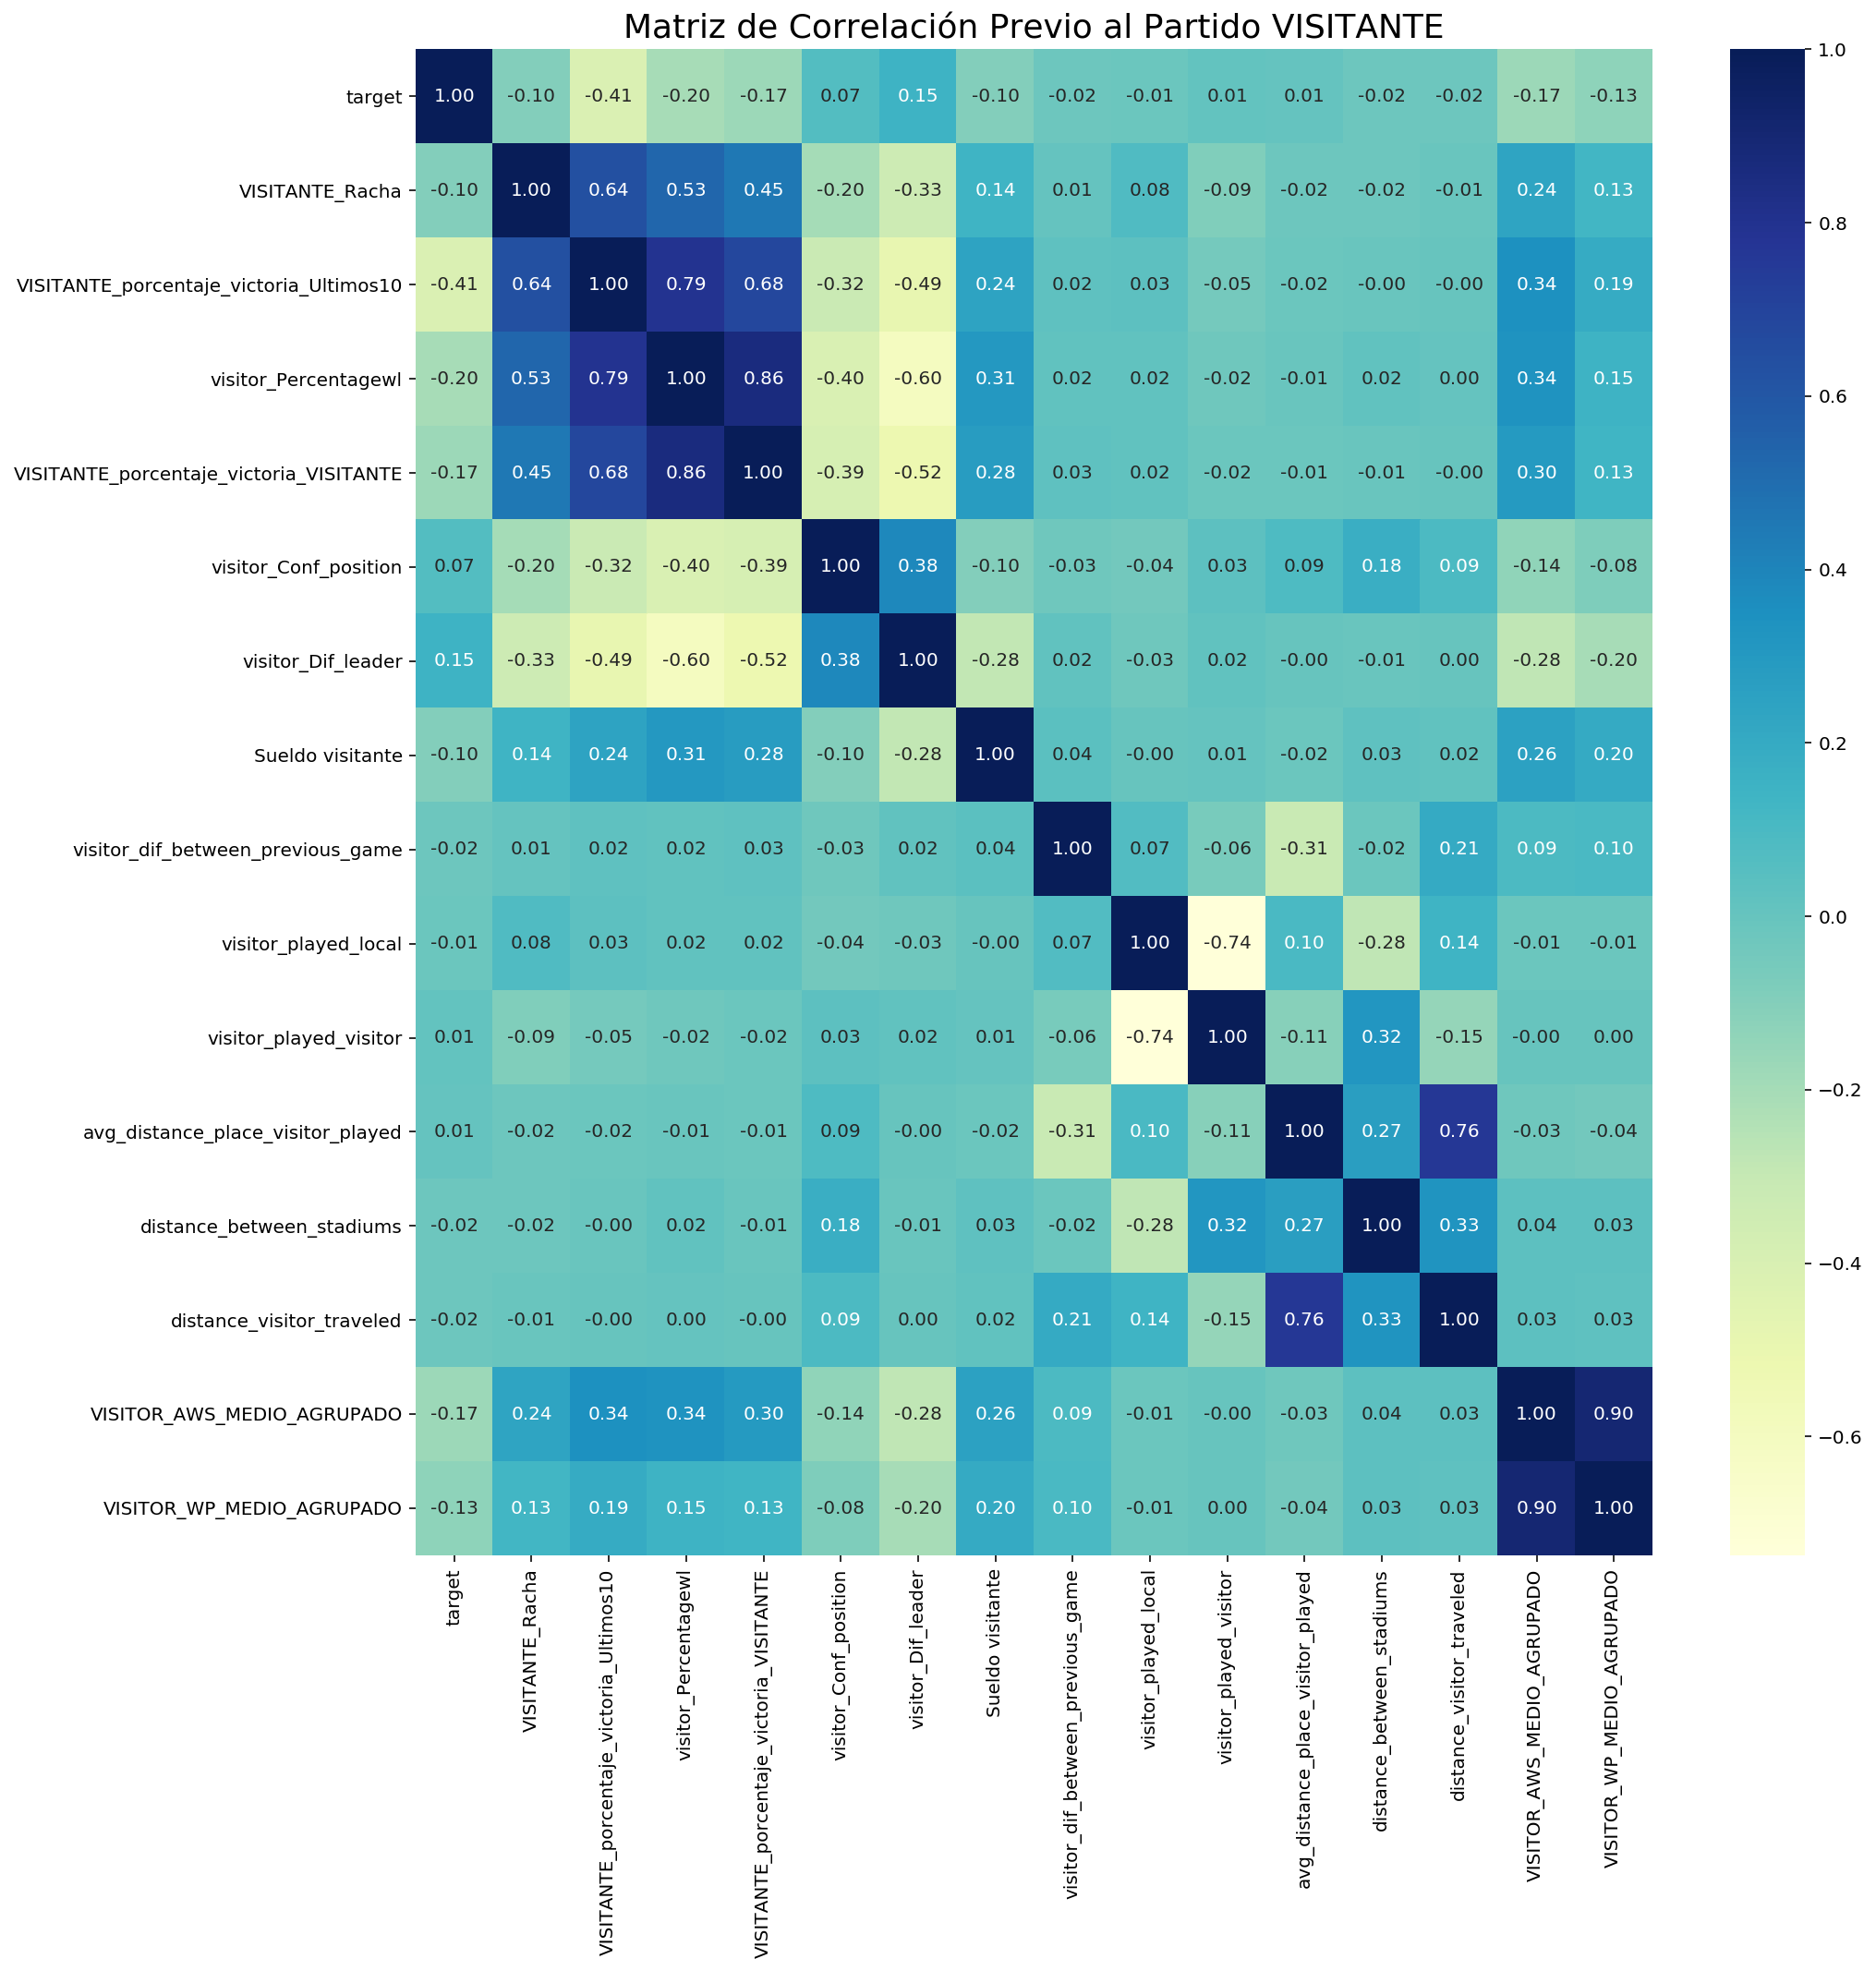

In [14]:
%matplotlib inline
# Heatmap PREV VISITANTE
import seaborn as sns
plt.figure(figsize=(15, 15))
sns_2 = sns.heatmap(prev_data_visitante.corr(), annot=True, fmt='.2f', cmap="YlGnBu")
sns_2.set_title('Matriz de Correlación Previo al Partido VISITANTE', fontsize=18)

Text(0.5, 1, 'Matriz de Correlación Durante el Partido LOCAL')

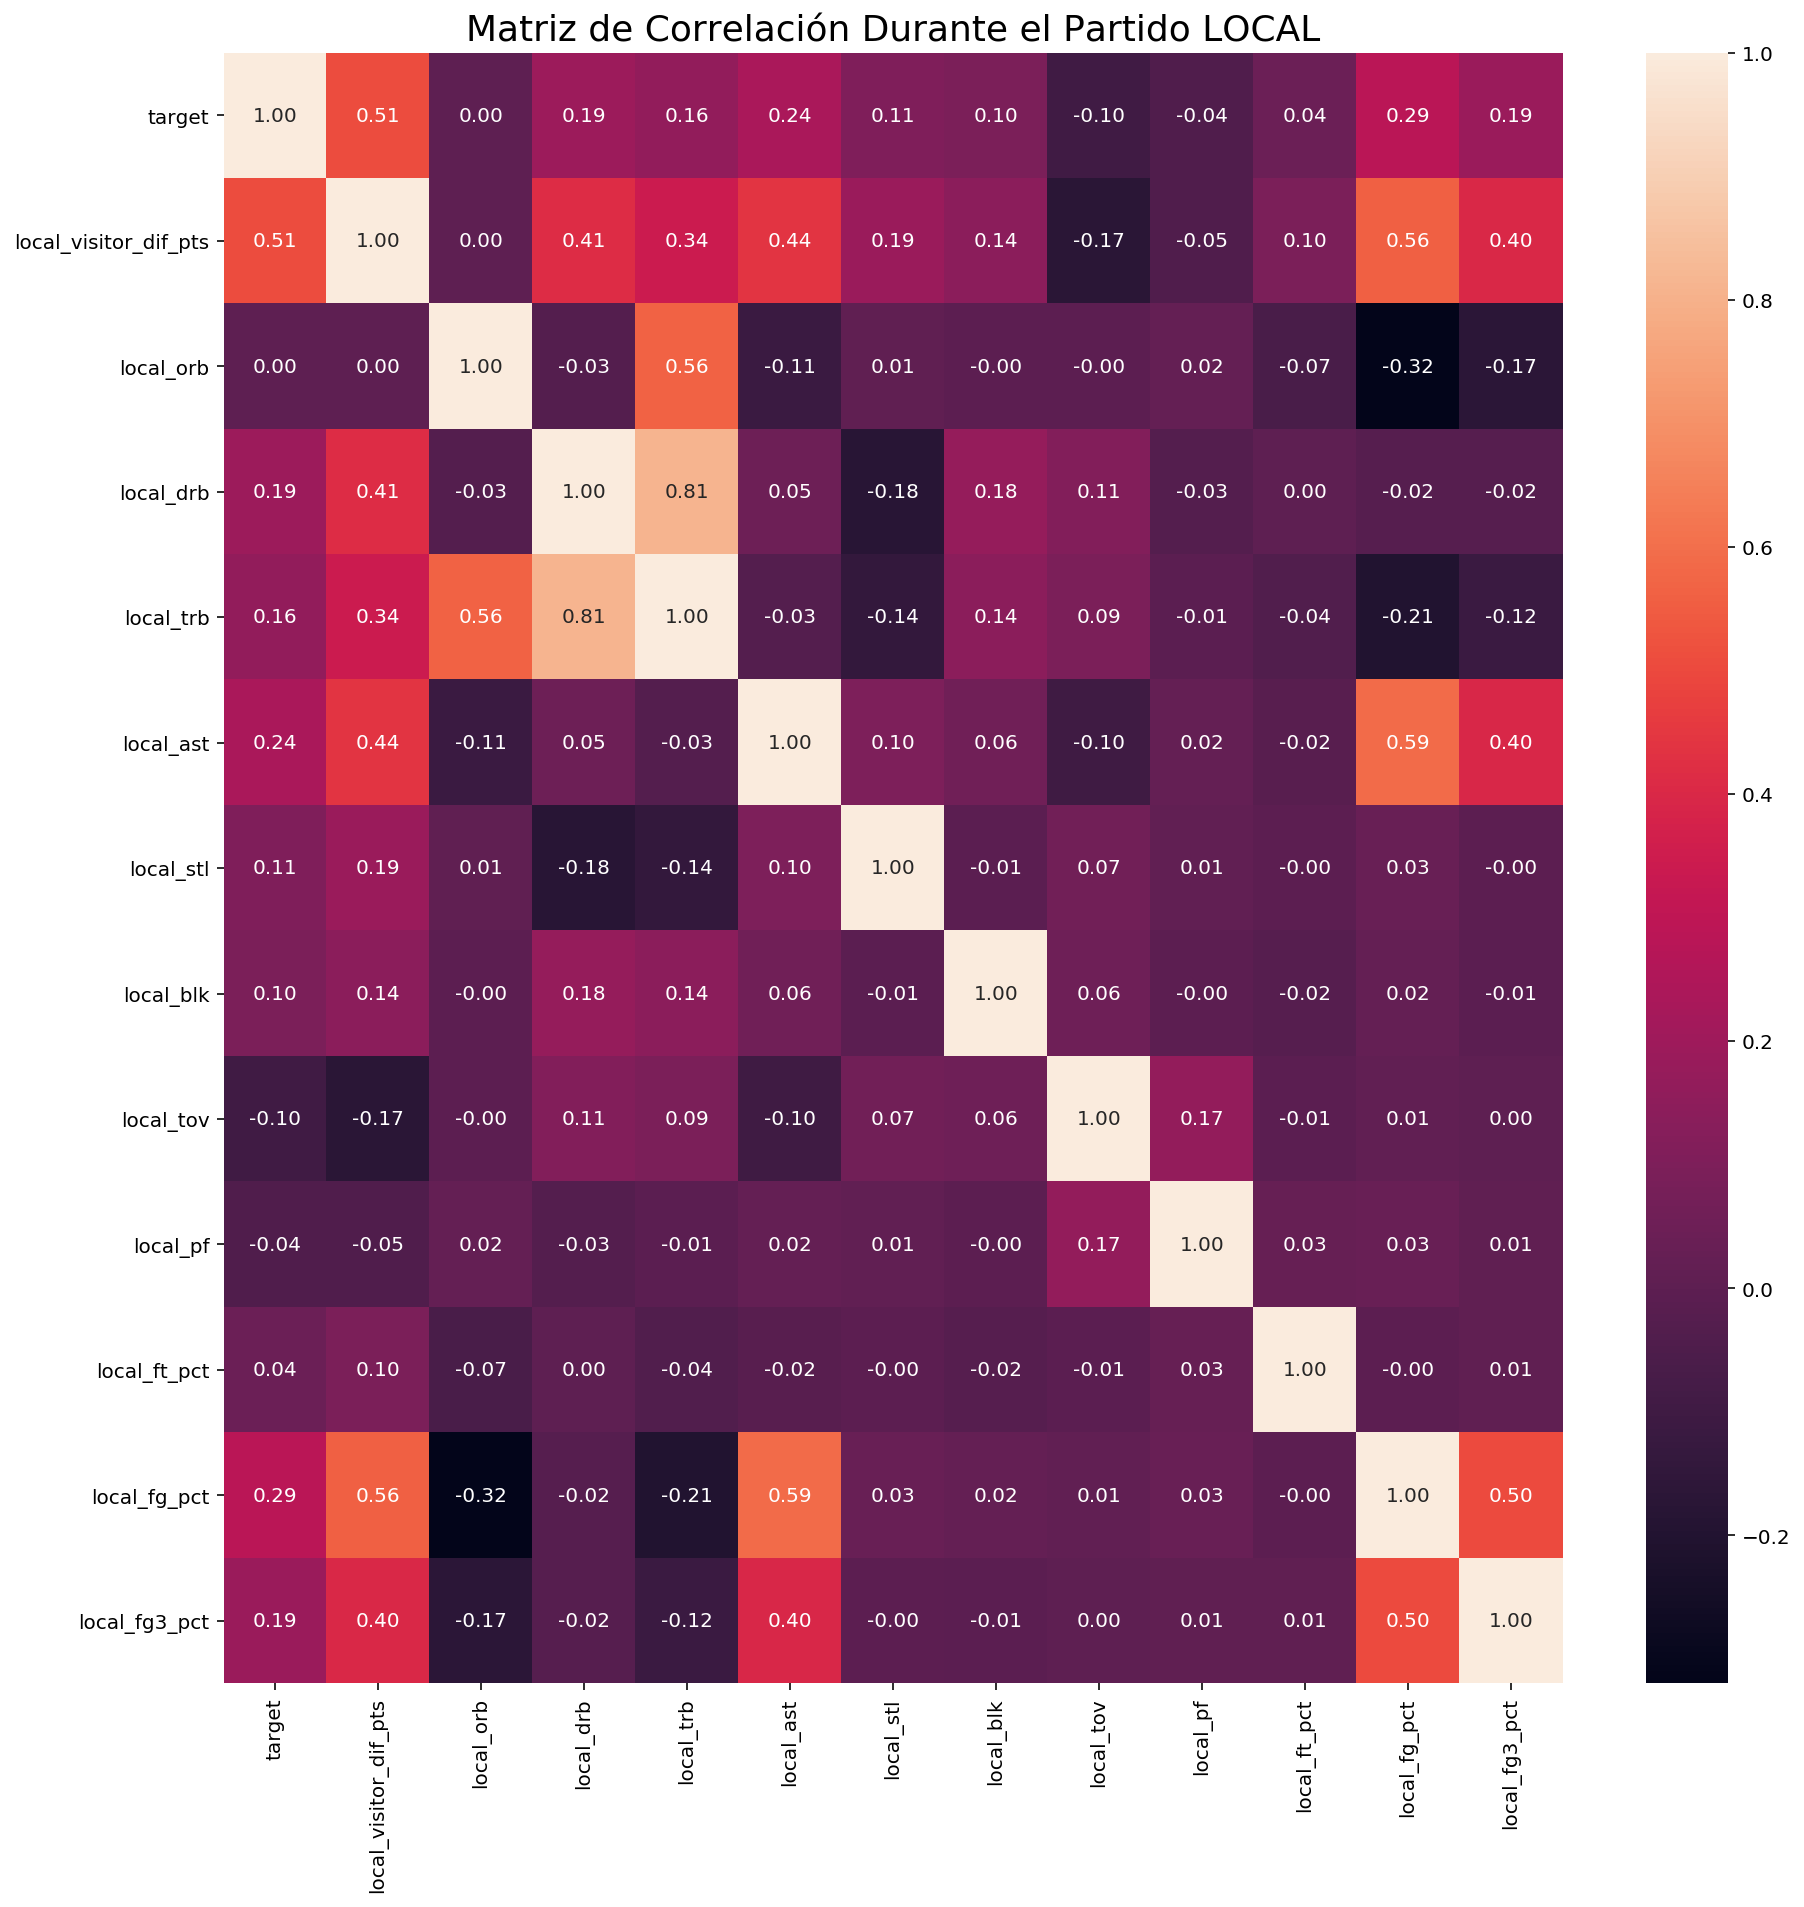

In [15]:
%matplotlib inline
# Heatmap GAME LOCAL
import seaborn as sns
plt.figure(figsize=(15, 15))
sns_3 = sns.heatmap(game_data_local.corr(), annot=True, fmt='.2f')
sns_3.set_title('Matriz de Correlación Durante el Partido LOCAL', fontsize=18)

Text(0.5, 1, 'Matriz de Correlación Durante el Partido VISITANTE')

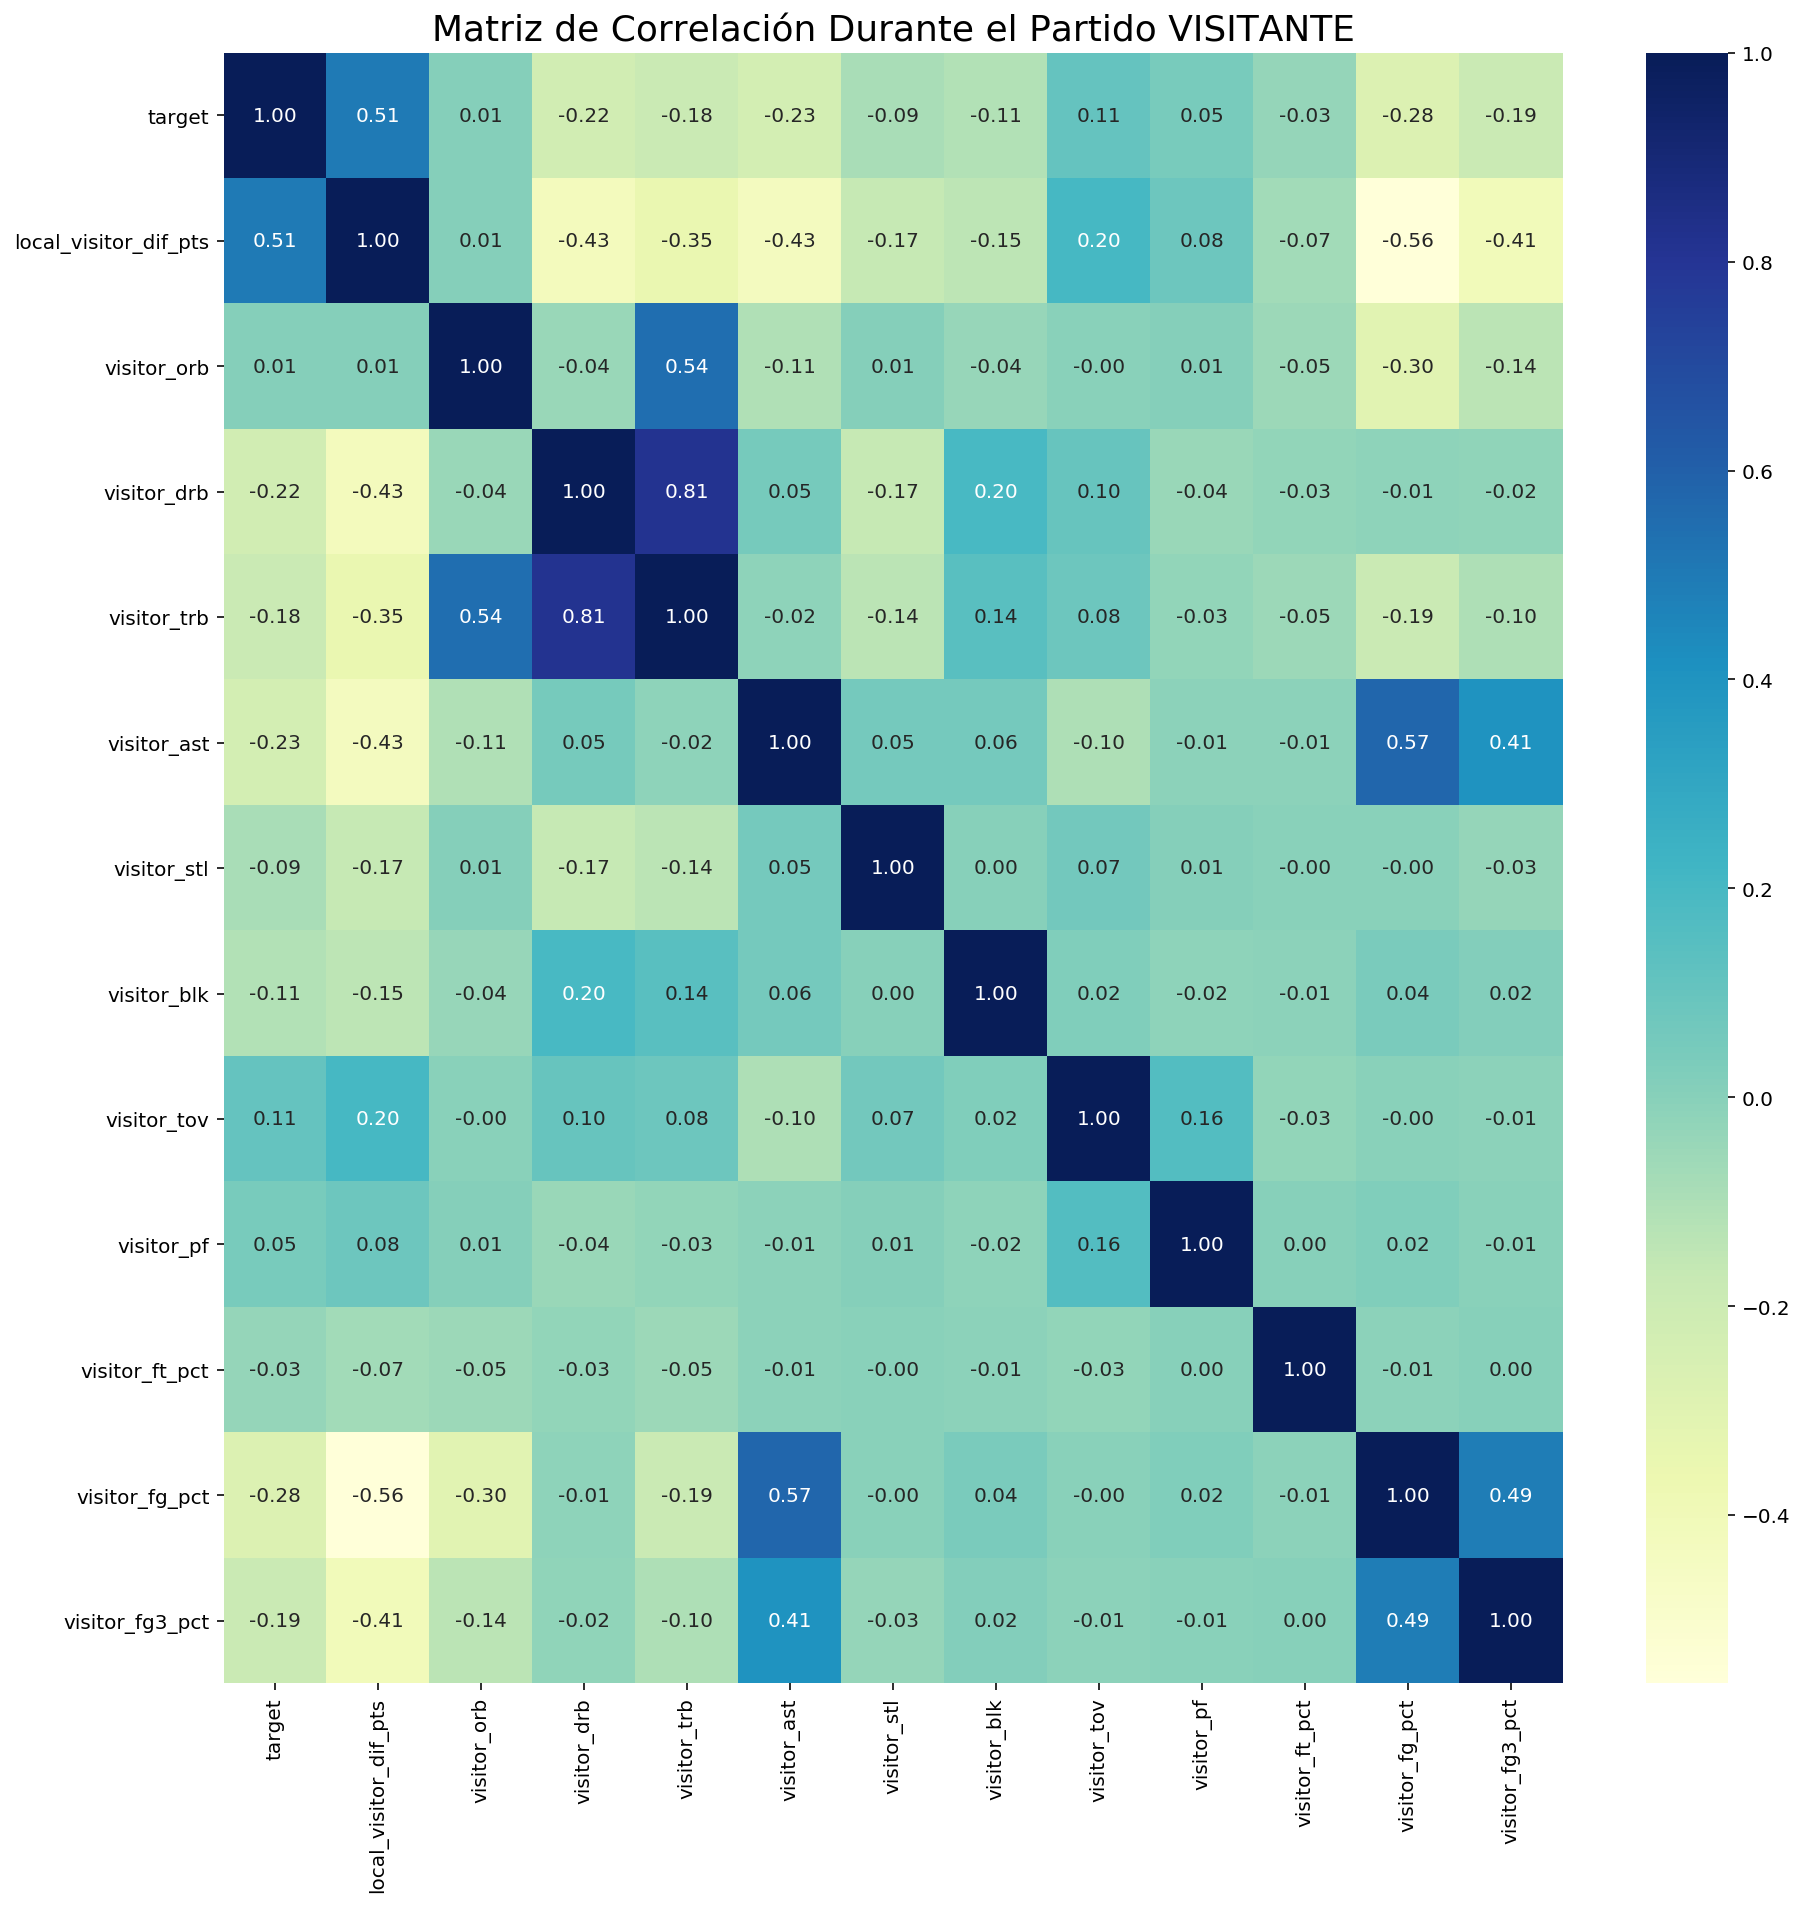

In [16]:
%matplotlib inline
# Heatmap GAME VISITANTE
import seaborn as sns
plt.figure(figsize=(15, 15))
sns_3 = sns.heatmap(game_data_visitante.corr(), annot=True, fmt='.2f', cmap="YlGnBu")
sns_3.set_title('Matriz de Correlación Durante el Partido VISITANTE', fontsize=18)

## Analisis de Matriz de Correlación

El descarte de variables por presencia de altos grados de correlación entre variables explicativas solo tiene sentido si se va a realizar un análisis de causalidad entre las variables explicativas y la objetivo. En estos casos no será posible atribuir y distingir el nivel de importancia de una variable respecto a la variable objetivo (porque estan siendo afectadas linealmente por otras).

Cuando se comete el error de excluir variables por presencia de altos niveles de correlación entre variables explicativas en entorno de modelos de predicción, se contribuye al deterioro de la precisión del modelo, esto se debe porque las variables en conjunto complementan y comprenden mayor información que cada una de estas por separado.

Asimismo, el descarte de variables por escasez de correlación es debatible (a menos que se pretenda utilizar estimaciones lineales), depende de la relación establecida a priori entre la variable y la objetivo. El coeficiente de correlación de Pearson, por ejemplo, es una medida de la relación "lineal" entre dos variables, en este contexto, se puede decir que no necesariamente las variables tienen que estar relacionadas linealmente.

A efectos de este estudio, se han descartado a priori (post matriz de correlación) variables que pretenden aportar la misma información en el modelo. En cualquier caso, de requerirse, se ha dejado en el notebook `funciones_modelo.ipynb` la función construida para **Factor Inflación de la Varianza (VIF)**  que permite de forma automática, descartar variables explicativas dependiendo del nivel de correlación establecido.

---------------------------------------------------------------------------------------------------------------------------

## Adelanto: Descarte de variables post al rendimiento del modelo:

Adelantando el proceso de selección de variables dentro del modelo, se ha evaluado el rendimiento de los modelos de Logistic Regression y Random Forest Classifier con la inclusión/exclusión de las variables **LOCAL_AWS_MEDIO_AGRUPADO y VISITOR_AWS_MEDIO_AGRUPADO** por las variables **LOCAL_WP_MEDIO_AGRUPADO y VISITOR_wp_MEDIO_AGRUPADO**.

De manera que, contrastando el rendimiento de ambos modelos, la inclusión de las variables por el cálculo de **WP** incrementa aproximadamente un 2% el AUC y el Accuracy en comparación con los modelos que incluyen las variables de **AWS**.

Para mayor información sobre esta comparativa revisar el desarrollo del trabajo `incluir link del trabajo`

In [17]:
var_continuas.remove("LOCAL_AWS_MEDIO_AGRUPADO")
var_continuas.remove("VISITOR_AWS_MEDIO_AGRUPADO")
print("Total variables continuas para modelos: "+str(len(var_continuas)))

Total variables continuas para modelos: 51


## Selección de Variables Dummy

Usando el test de independencia de chi-cuadrado e información mutua (mutual information)

**¿Incluir la totalidad de datos en la selección de variables? o ¿solo seleccionar las variables con los datos de entrenamiento?**

Realizaremos la selección solo con los datos de entrenamiento, para evitar en cualquier caso ventajas del modelo sobre los datos de test que en teoría no debería conocer de ningúna forma.


**Bibliografía:**

[stackoverflow.com](https://stackoverflow.com/questions/56308116/should-feature-selection-be-done-before-train-test-split-or-after)

[towardsdatascience.com](https://towardsdatascience.com/why-not-to-select-features-before-splitting-your-data-2d6aba2e9fb)

[www.researchgate.net](https://www.researchgate.net/post/Should_Feature_Selection_using_Feature_Importance_Scores_of_Tree-based_Algorithms_be_done_before_Train-Test_Split_or_after_that)

[machinelearningmastery.com](https://machinelearningmastery.com/an-introduction-to-feature-selection/)

In [18]:
partidos = data[all_variables] # Dataframe de trabajo

from sklearn.model_selection import train_test_split


variables, target = partidos[dummy], partidos.iloc[:, -1:]

x_train, x_test, y_train, y_test = train_test_split(variables, target, test_size = 0.30, random_state=1)
# Cuidado con el Random_state, hay que realizar diversas pruebas para no seleccionar siempre el mismo
# conjunto de datos y se tenga un sesgo sobre las variables

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4066, 26)
(1743, 26)
(4066, 1)
(1743, 1)


Div_local_Northwest
Div_local_Pacific
Div_local_Southeast
visitor_played_previous_date
visitor_played_two_days_ago
visitor_played_three_days_ago
visitor_played_prorrogue_previous_date
visitor_played_prorrogue_two_days_ago
visitor_played_prorrogue_three_days_ago
Conf_visitor_Este
Div_visitor_Southeast


<BarContainer object of 26 artists>

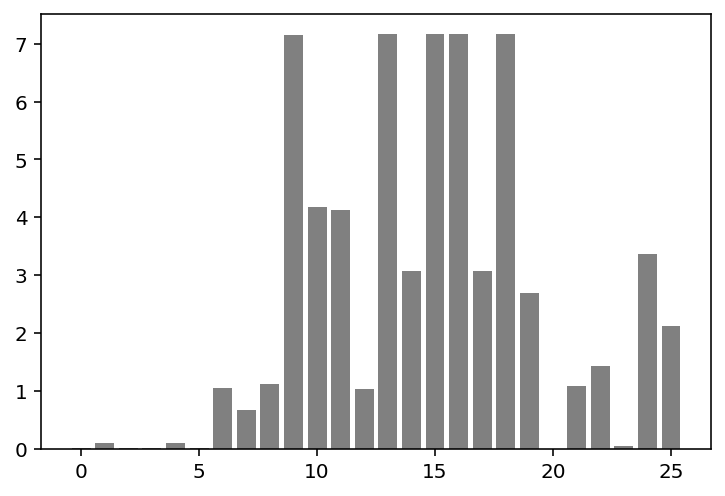

In [19]:
%matplotlib inline
from sklearn.feature_selection import SelectKBest, chi2

fs = SelectKBest(score_func=chi2, k='all')
fs.fit(x_train[dummy], y_train)
x_train_fs = fs.transform(x_train[dummy])
x_test_fs = fs.transform(x_test[dummy])

mask = fs.get_support()
chi2_variables = list(x_train[dummy].columns[mask])

# Seleccionamos aquellas variables que tienen un score superior a la media (criterio propio para reducir variables)
chi2_var = []
for b in range(len(fs.scores_)):
    if fs.scores_[b] >= mean(fs.scores_):
        chi2_var.append(chi2_variables[b])
        print(chi2_variables[b])
        
# plot
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_, color = 'gray')

local_played_three_days_ago
Conf_local_Este
Div_local_Atlantic
Div_local_Northwest
Div_local_Southwest
visitor_played_two_days_ago
visitor_played_prorrogue_three_days_ago
Conf_visitor_Este
Div_visitor_Atlantic
Div_visitor_Southeast


<BarContainer object of 26 artists>

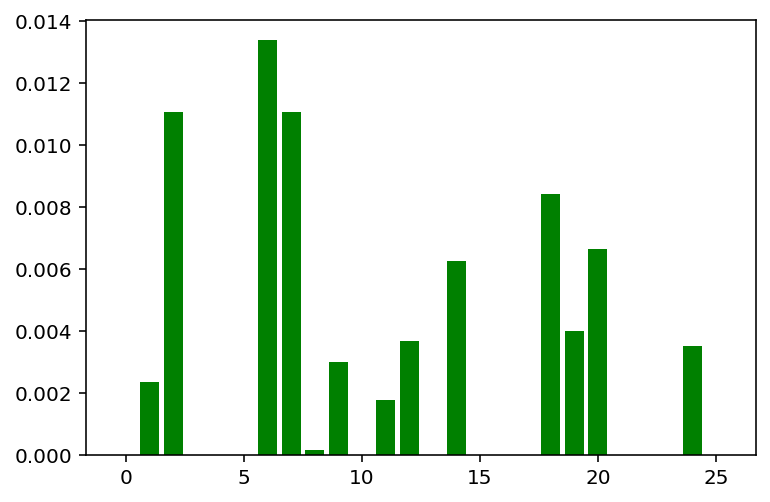

In [20]:
%matplotlib inline
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

fs = SelectKBest(score_func=mutual_info_classif, k='all')
fs.fit(x_train[dummy], y_train)
x_train_fs = fs.transform(x_train[dummy])
x_test_fs = fs.transform(x_test[dummy])

mask = fs.get_support()
info_variables = list(x_train[dummy].columns[mask])

# Seleccionamos aquellas variables que tienen un score superior a la media (criterio propio para reducir variables)
info_var = []
for b in range(len(fs.scores_)):
    if fs.scores_[b] >= mean(fs.scores_):
        info_var.append(info_variables[b])
        print(info_variables[b])

# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_, color = 'green')

La información mutua (mutual information) es una cantidad que mide la relación entre dos variables aleatorias que se muestrean simultáneamente. En particular,  mide cuánta información se comunica, en promedio, en una variable aleatoria
sobre otra.

**Intuitivamente nos indica cuánto una variable informa sobre otra.**

Un teorema importante de la teoría de la información dice que la información mutua entre dos variables es 0 si y solo si las dos variables son estadísticamente independientes.

En efecto, el mismo resultado que evaluamos cuando se realiza la hipótesis nula de un test de chi-cuadrado y se espera rechazar cuando se realiza selección de variables categóricas, por ejemplo.

Más allá del criterio estadístico, luego de evaluar ambos enfoques, **se decide utilizar las variables seleccionadas por el cálculo de la información mutua**, a priori, parece que las variables seleciconadas tienen mayor importancia en cuanto al criterio del deporte del baloncesto respecta


**Bibliografía:**

[Entropy and Mutual Information (Department of Computer Science
University of Massachusetts)](https://people.cs.umass.edu/~elm/Teaching/Docs/mutInf.pdf)

[An introduction to mutual information (Youtube)](https://www.youtube.com/watch?v=U9h1xkNELvY)

[machinelearningmastery.com](https://machinelearningmastery.com/information-gain-and-mutual-information/)

# Parte II: Selección de Modelos

Antes de comenzar con la creación del modelo es necesario separar la muestra para el entrenamiento y test.

Para el correcto funcionamiento de las funciones creadas en esta sección es **estrictamente necesario que los datos de test y entrenamientos tengan el mismo tamaño**.

Sabemos que este no es el mejor enfoque, así como la inclusión de la totalidad de variables, pero es el más sencillo y rápido que ayudará a determinar cuales son los modelos, en su version mas sencilla, con mayor poder de predicción en entrenamiento.

Es importante destacar que no es relevante los resultados en test, este análisis busca determinar qué tipo de modelo se ajusta mejor a los datos.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

var_modelo = var_continuas + info_var # lista de variables seleccionadas

variables = partidos[var_modelo]

variables = partidos[1:] # eliminamos la primera fila (poco significativa) para tener una distribucion igualitaria

variables, target = variables.iloc[:,variables.columns != "target"], variables.iloc[:,variables.columns == "target"]

x_train, x_test, y_train, y_test = train_test_split(variables, target, test_size = 0.5, random_state=1)


# Para evualuar correctamente los modelos lineales quitamos la media y escalamos a la varianza unitaria
# de manera que cada observación:     z = (x - u) / s  

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2904, 78)
(2904, 78)
(2904, 1)
(2904, 1)


## ¿Presencia de Datos Desbalanceados?

Cuando el conjunto de datos no representa todas las clases de datos por igual, el modelo podría ajustarse en exceso a la clase que está más representada en su conjunto de datos (en nuestro caso como es de esperarse mayor juegos ganados por parte del local) y pasar por alto la existencia de la clase minoritaria (los juegos perdidos del local).

Se ha evidenciado presencia de datos desbalanceados desde el inicio del proyecto, sin embargo, esta ha disminuido a medida que hemos podido ingresar mas datos.

A inicios del proyecto se evidenciaban niveles de 70%-30% (sobre la variable target), y se ha podido reducir esta diferencia hasta un 60-40%.

Con esta distribución no parece tener problemas la construcción del modelo, en cierto sentido, el modelo debe tener una ligera preferencia (como lo es en la realidad) porque gane el local.

De darse el caso, ¿cuál es la forma correcta de afrontar este problema?

En teoria se deberia realizar una operacion de **Oversampling** ¿por que?:

En este contexto, de forma exagerada, imaginemos que nuestro modelo siempre estima juego ganado para local, dado los datos, sobre la totalidad de resultados igual a 1 tendrá un accuracy aprox. igual a 60%.


**Bibliografía:**

[towardsdatascience.com](https://towardsdatascience.com/what-to-do-when-your-classification-dataset-is-imbalanced-6af031b12a36)

[towardsdatascience.com](https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18)

[machinelearningmastery.com](https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/)

In [22]:
partidos.target.value_counts() 

1    3389
0    2420
Name: target, dtype: int64

## Dataframe de comparación de modelos (AUC-Gini)

En aprendizaje automático es ampliamente conocido evaluar modelos a través del cálculo del área bajo la curva (AUC por sus siglas en inglés).

AUC significa "área bajo la curva ROC". Esto significa que el **AUC mide toda el área bidimensional por debajo de la curva ROC** desde (0,0) hasta (1,1).

El área bajo la curva es una métrica de evaluación de modelos que considera todos los umbrales de clasificación posibles.

Entendiéndose *umbrales de clasificación*; como criterio de valor escalar que se aplica a la predicción de un modelo para separar la clase positiva de la negativa.

Matemáticamente la **curva ROC** es la *tasa de verdaderos positivos* frente a la *tasa de falsos positivos* en diferentes umbrales de clasificación.


$TPR = \frac{VP}{VP + FN}$

$FPR = \frac{FP}{FP + VN}$


Donde: **VP** = Verdaderos positivos, **VN** = Verdaderos negativos, **FP** = Falsos positivos y **FN** = Falsos negativos

---------------------------------------------------------------------------------------------------------------------------

La medida de rendimiento del AUC está estrechamente relacionada con el coeficiente de Gini que en muchos casos se utiliza como una medida alternativa.

Comúnmente se conoce el índice de Gini como el doble del área entre la curva ROC y la diagonal. 

$Gini = {2 * AUC -1}$

Nota: no debe confundirse con la medida de impureza de gini utilizada en los algoritmos de árboles de decisión.


**Bibliografía:**

[Google Developers: Machine Learning](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)

[The relationship between Gini methodology
and the ROC curve (Edna Schechtman and Gideon Schechtman)](https://poseidon01.ssrn.com/delivery.php?ID=883022123123084089028094007000103126050076068001039051073091003098009025097117089095110048059008102059004069090106065116106004012020000002083003090069065084125064081036047002120072112076120028126012124114007112024105118126092112118076108007081117120&EXT=pdf)


In [23]:
import import_ipynb # pip install import_ipynb
from funciones_modelo import train_method, GS


dict_trained_model = train_method(x_train, y_train,x_test,y_test,"LR") #solo un ejemplo
method_list = ['LR','LASSO','LOGR','RIDGE', 'DT','RFR','RFC','GBR'] 
df_result_summary = pd.DataFrame(index=method_list,columns=['GINI-train','GINI-test', 'Caída %'])
C1 = []
C2 = []
C3 = []
for method in method_list:
    dict_trained_model[method] = train_method(x_train, y_train,x_test,y_test,method)
    # Predicciones - REGRESIONES
    if method in ['LR','LASSO','RIDGE','RFR','GBR']: 
        y_pred_train = dict_trained_model[method]['model'].predict(x_train)
        y_pred_test = dict_trained_model[method]['model'].predict(x_test)
    else: # Predicciones - CLASIFICADORES
        y_pred_train = dict_trained_model[method]['model'].predict_proba(x_train)[:,1]
        y_pred_test = dict_trained_model[method]['model'].predict_proba(x_test)[:,1]
    # Calculo de GINI
    gini_score_train = GS(y_train,y_pred_train)
    C1.append(gini_score_train)
    gini_score_test = GS(y_test,y_pred_test)
    C2.append(gini_score_test)
    diferencia = (1-(gini_score_test/gini_score_train)) * 100
    C3.append(diferencia)
    
# Append al dataframe
df_result_summary ['GINI-train'] = C1
df_result_summary ['GINI-test'] = C2
df_result_summary ['Caída %'] = C3

# Print
df_result_summary.sort_values('GINI-train', ascending=False)

importing Jupyter notebook from funciones_modelo.ipynb


,GINI-train,GINI-test,Caída %
DT,1.000000,0.424626,57.537424
RFC,1.000000,0.729264,27.073627
RFR,1.000000,0.746823,25.317715
GBR,0.999996,0.776182,22.381464
LOGR,0.855096,0.831220,2.792181
LR,0.853234,0.833299,2.336463
RIDGE,0.853203,0.833416,2.319095
LASSO,0.843091,0.827948,1.796152


## Dataframe de comparación de modelos (Accuracy)

#### Accuracy (exactitud)
La exactitud es una métrica para evaluar modelos de resultados de clasificación. 

Informalmente, la exactitud es la fracción de predicciones que el modelo realizó correctamente.

Formalmente, la exactitud tiene la siguiente definición:

$A = \frac{VP + VN}{VP + FP + VN + FN}$

Donde: **VP** = Verdaderos positivos, **VN** = Verdaderos negativos, **FP** = Falsos positivos y **FN** = Falsos negativos

**Bibliografía:**

[Google Developers: Machine Learning](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)


In [24]:
from funciones_modelo import train_method, GS

data = []
for method in method_list:
    dict_trained_model[method] = train_method(x_train, y_train,x_test,y_test,method)
#    print (dict_trained_model[method])
    data.append([method, dict_trained_model[method]['accuracy_train'], dict_trained_model[method]['accuracy_test']])

df_result_summary_2 = pd.DataFrame(data,columns=['method','accuracy_train','accuracy_test']) 
                
df_result_summary_2.sort_values('accuracy_train', ascending = False)

,method,accuracy_train,accuracy_test
4,DT,1.000000,0.719353
6,RFC,1.000000,0.788567
7,GBR,0.932826,0.432720
5,RFR,0.922093,0.418645
2,LOGR,0.857782,0.834022
3,RIDGE,0.510003,0.480654
0,LR,0.509991,0.480586
1,LASSO,0.489389,0.471590


## ¿Qué modelo elegir?

Justo como se ha comentado en el inicio de este apartado (Parte II), el objetivo es determinar el modelo de aprendizaje automático que mejor se ajusta a los datos.

En este contexto, solo se deben considerar los resultados en entreamiento e ignorar así los resultados en test; este último nos sirve de referencia para determinar el % de caída de la generalización del modelo (sabiendo que los parámetros de todos los modelos vienen por defecto y no se ha realizado una selección de variables importantes).

Sobre el **dataframe de resultados de Gini**, se observan muy buenos resultados en general, entre otras cosas, los modelos de árboles de decisión sobreajustados (comportamiento usual en este tipo de algoritmos complejos) y los modelos lineales con mayor capacidad de generalización en cuanto a test (menor % de caída).

Sobre el **dataframe de resultados de Accuracy**, destacan los modelos de árboles de decisión con elevados resultados en train y poco % de caída en cuanto a test. De igual forma el comportamiento del Logistic Regression entre los modelos lineales.

Posterior al análisis, se decide elegir el **Random Forest Classifier** y el **Logistic Regression** para el desarrollo de los modelos.

Finalmente, vale destacar que la bibliografía que nos ha impulsado a realizar este estudio, se inclina en la elección del **Logistic Regression** como el indicado.

Nota: a efectos de otros estudios se deben deben evaluar el resto de modelos.

# Parte III: Construcción de modelos

## División en Entrenamiento y Test 

In [25]:
from sklearn.model_selection import train_test_split

var_modelo = var_continuas + info_var # lista de variables seleccionadas

variables = partidos[var_modelo]

variables, target = variables.iloc[:,variables.columns != "target"], variables.iloc[:,variables.columns == "target"]

x_train, x_test, y_train, y_test = train_test_split(variables, target, test_size = 0.30, random_state=1)

# En este caso no realizamos ninguna transformación sobre los datos, necesitamos las variables en su naturaleza  

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4066, 60)
(1743, 60)
(4066, 1)
(1743, 1)


## Selección de Variables: Random Forest Classifier Feature Importance

Text(0.5, 1.0, 'Feature Importance Random Forest Classifier')

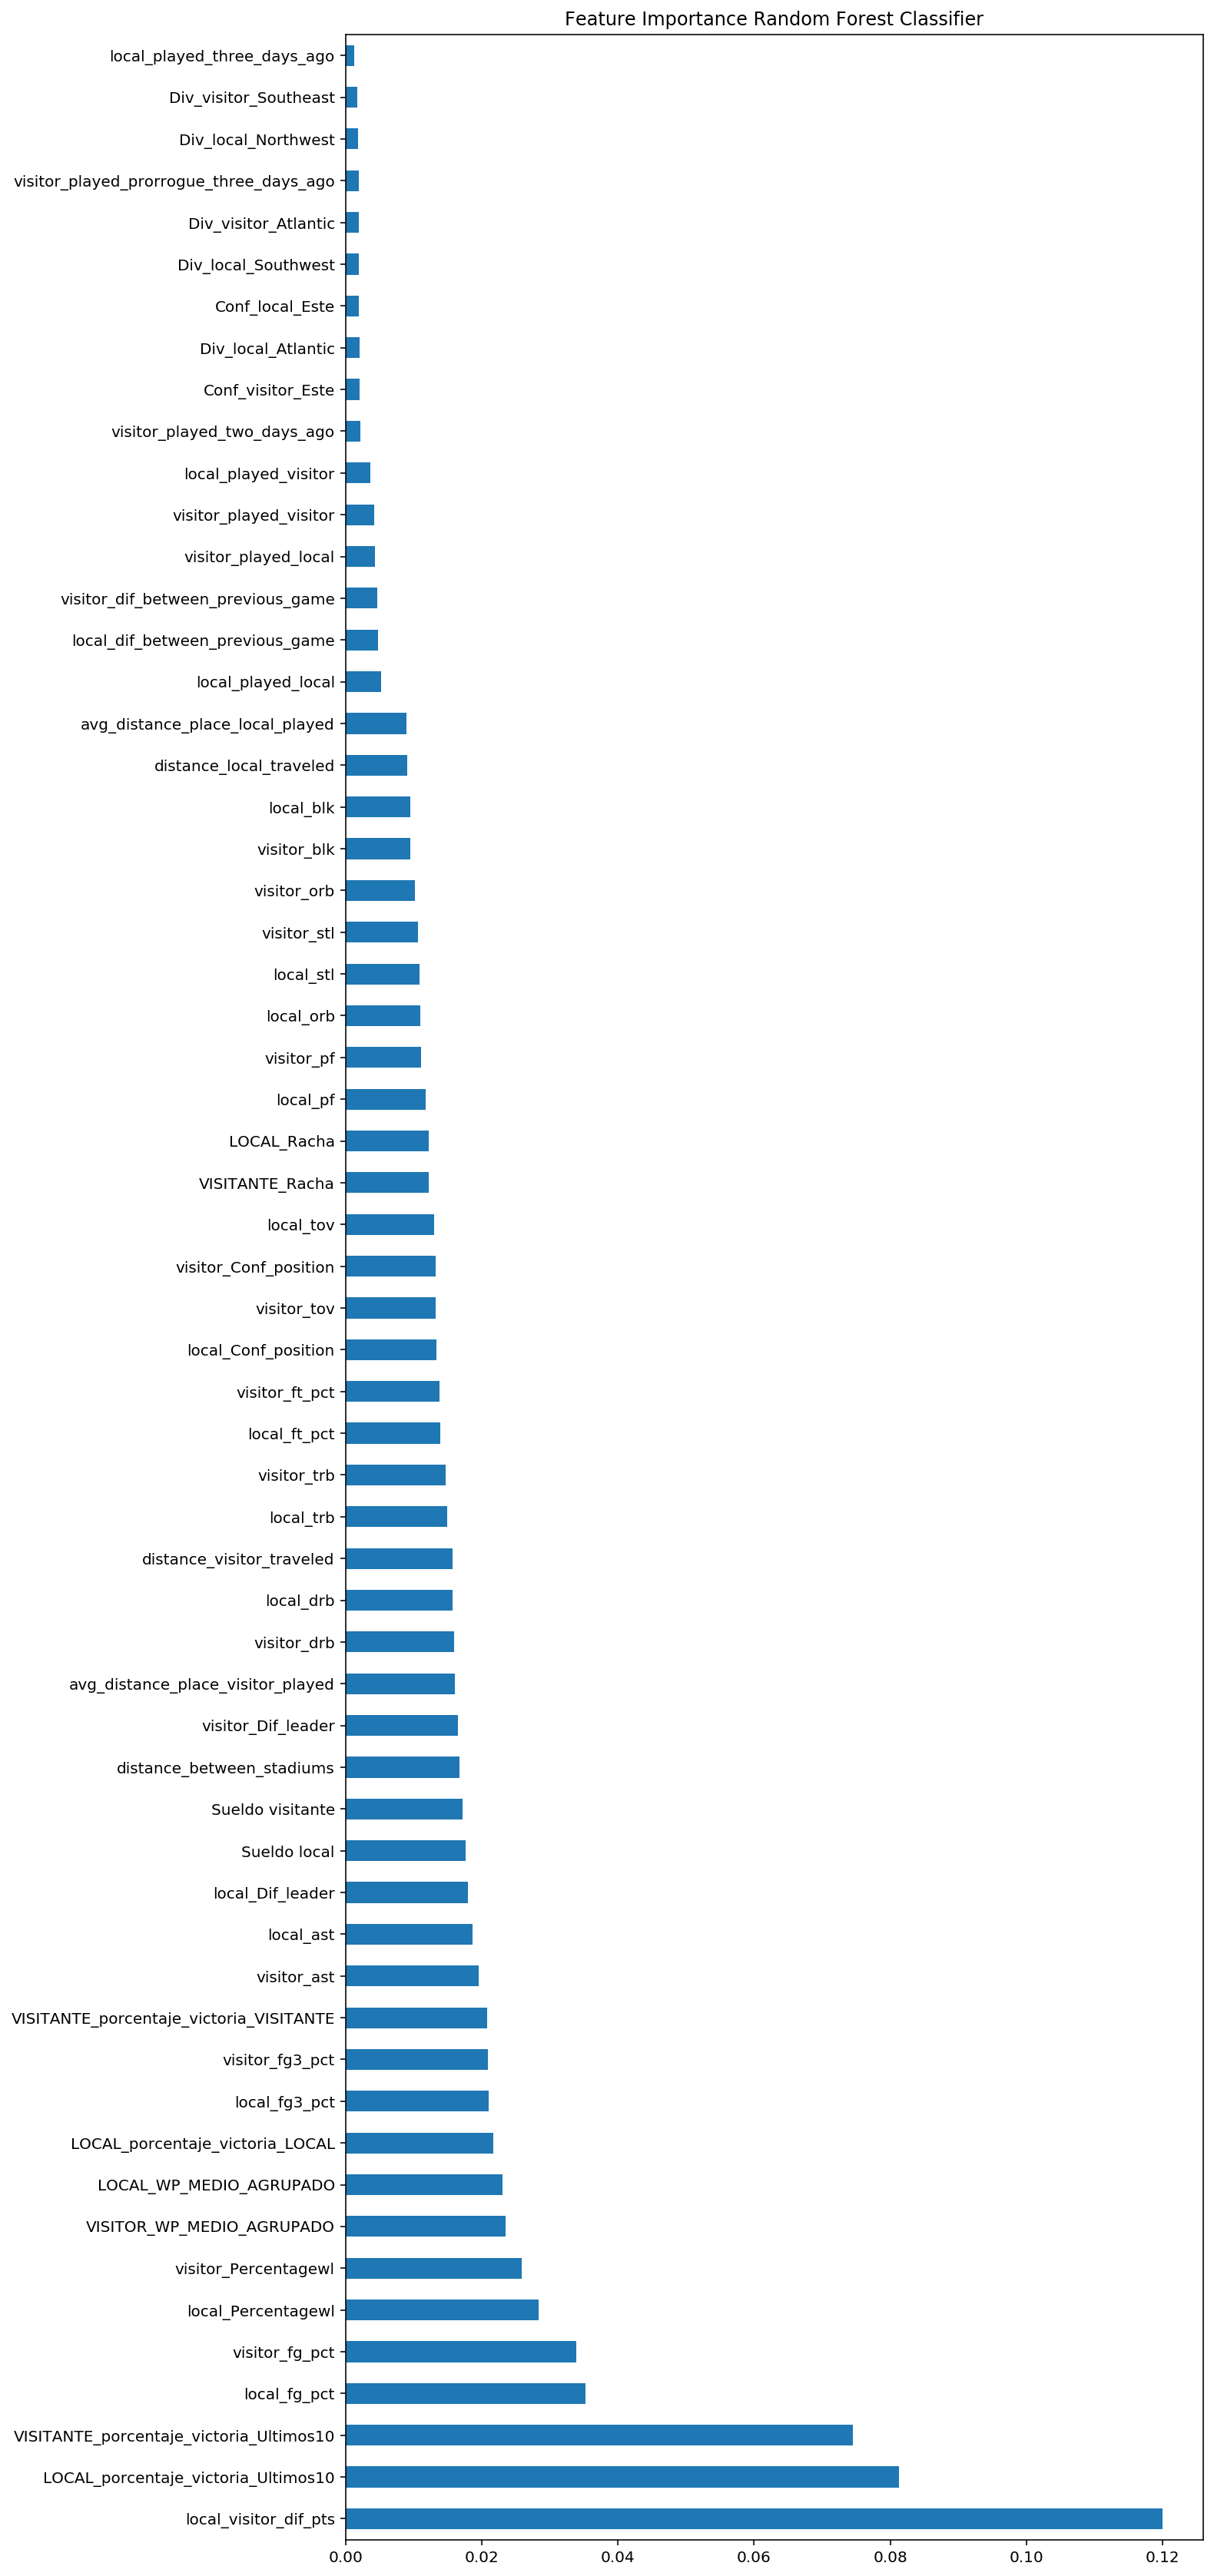

In [26]:
%matplotlib inline 
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier


list_var = list(set(x_train.columns)) # Variables de entrenamiento

# Usar el modelo RandomForestClassifier() con la optimización de parámetros da el mismo resultado...
# Dejaremos la selección por default tal como tiene el desenlace de este notebook
       
forest = RandomForestClassifier(random_state=1, 
                                n_estimators=1000, 
                                criterion="gini",
                               n_jobs=-1) # luego de verificar que los resultados no varían

forest.fit(x_train, y_train) # Entrenamiento

importances = forest.feature_importances_

std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)

indices = np.argsort(importances)
indices_2 = np.argsort(importances)[::-1]

rf_variables = []
for f in range(27): # eleccion arbitraria, esto luego se va probando hasta determinar el optimo...
    rf_variables.append(list_var[indices_2[f]])


feat_importances = pd.Series(importances, index=x_train.columns)
feat_importances.nlargest(len(x_train.columns)).plot(kind='barh', figsize=(10,30))
plt.title("Feature Importance Random Forest Classifier")

## Selección de Variables: Permutation Importance

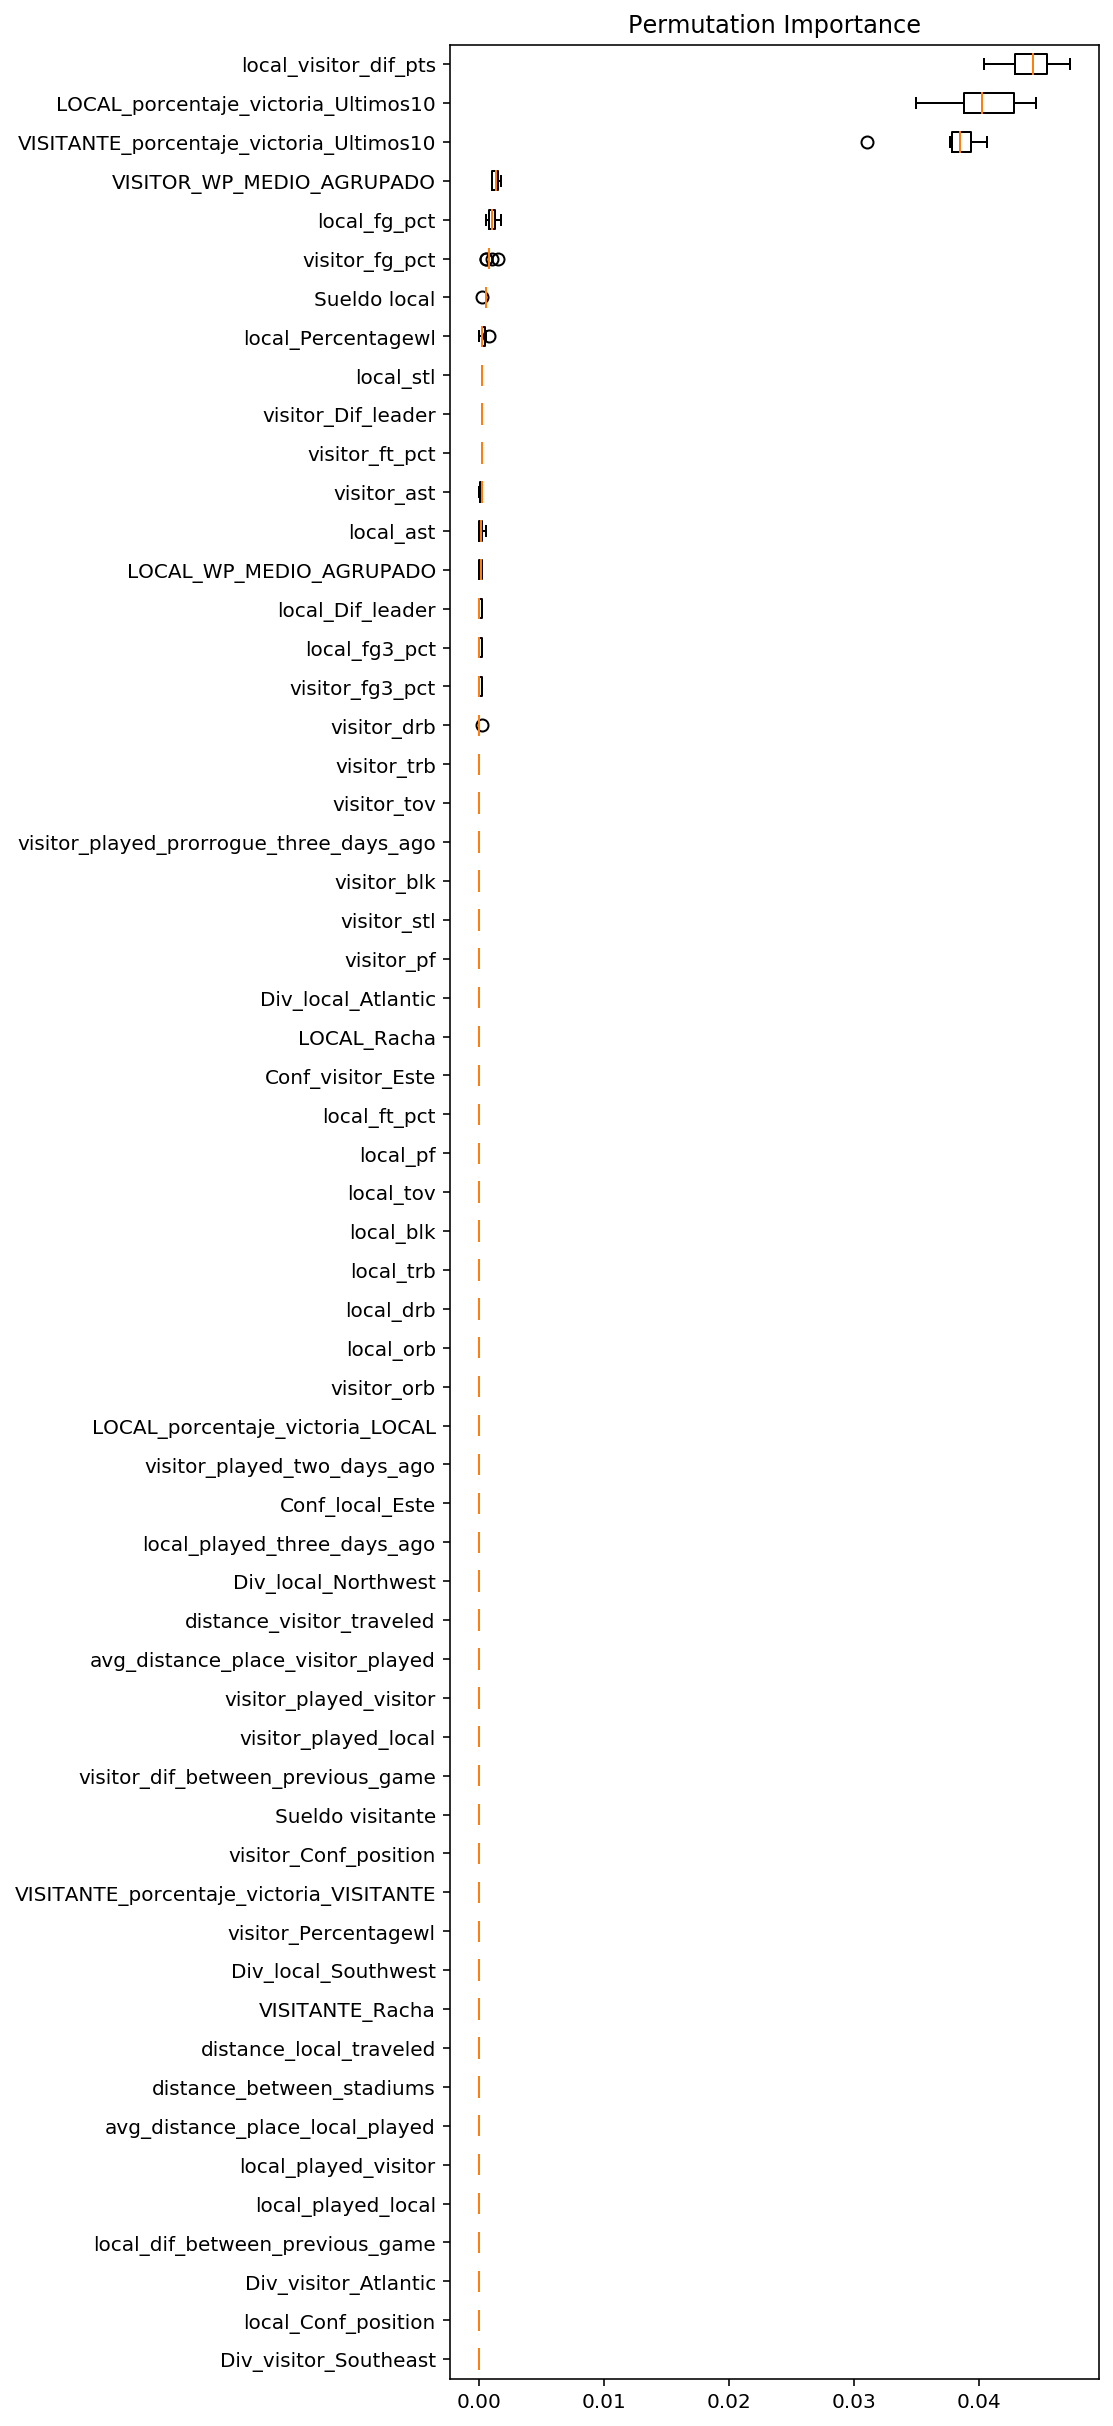

In [27]:
from sklearn.inspection import permutation_importance

result = permutation_importance(forest, x_train, y_train, n_repeats=10,
                                random_state=1, n_jobs=2)

sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()

ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=x_train.columns[sorted_idx])
ax.set_title("Permutation Importance")
fig.tight_layout()

fig.set_figheight(20)
fig.set_figwidth(10)

In [28]:
rf_variables_2 = list(x_train.columns[sorted_idx][-27:]) # Las primeras 27 variables

rf_variables_3 = list(list(x_train.columns[sorted_idx][-58:]) + info_var) # TODAS LAS VARIABLES

Como soporte de adecuada selección de variables realizada por el *feature selection* del random forest classifier se ha propuesto usar el *permutation importance*.

Tal como se demuestra en la web de la libreria de [sklearn](https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-py) el *feature selection* de random forest classifier suele inflar la importancia de las variables numéricas. 

En muchos casos, es posible encontrar altos niveles de importancia en el modelo sobre variables que no tienen relación alguna con target.

En este contexto, utilizamos como criterio final *permutation importance* como método de selección final.

En este punto, y conociendo los defectos de este proceso de selección sobre las variables dummy.

¿Debemos incluir las variables previamente seleccionadas por test de chi-cuadro e información mutua?

Según las diversas pruebas realizadas, la inclusión de las variables dummy contribuye a incrementar la complejidad del modelo sin incurrir en el deterioro de las métricas de evaluación del modelo.


**Bibliografía:**

[permutation_importance (sklearn)](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html#sklearn.inspection.permutation_importance)

[plot_forest_importances (sklearn)](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html)



[L. Breiman, “Random Forests”, Machine Learning, 45(1), 5-32, 2001.](https://doi.org/10.1023/A:1010933404324)

## Hiperparametrización Random Forest Classifier

In [29]:
# https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

def Grid_Search_CV_RFR(X_train, y_train):


    estimator = RandomForestClassifier() # scoring = ['accuracy','precision', 'recall', '‘roc_auc’'] FALTA MAS EVALUACION
    param_grid = [{"n_estimators": [100, 250, 500],
                  "max_features": ["auto", "sqrt", "log2"],
                  "min_samples_split": [2,4,8,16],
                  "bootstrap": [True, False],
                  "criterion": ['gini']},
                  {"n_estimators": [100, 250, 500],
                   "max_features": ["auto", "sqrt", "log2"],
                   "min_samples_split": [2,4,8,16],
                   "bootstrap": [True, False],
                   "criterion": ['entropy']}]

    grid = GridSearchCV(estimator, param_grid
                        ,n_jobs = -1, 
                        cv = 5, 
                        scoring= 'accuracy') # cambiar CV, depende del tamaño de los datos

    grid.fit(X_train, y_train)

    return grid.best_score_ , grid.best_params_

def RFC(X_train, X_test, y_train, y_test, best_params):

    estimator = RandomForestClassifier(n_jobs=-1).set_params(**best_params)
    estimator.fit(X_train,y_train)
    y_predict = estimator.predict(X_test)
    #print ("GINI:",GS(y_test,y_predict))
    return y_test,y_predict

In [30]:
#### ESTE CÓDIGO LLEVA MUCHO TIEMPO DE EJECUCIÓN

for i in range(5):
    print ("Loop: " , i)
    print ("--------------")

    
    best_score, best_params = Grid_Search_CV_RFR(x_train[rf_variables_2], y_train)
    y_test , y_predict = RFC(x_train[rf_variables_2], x_test[rf_variables_2], y_train, y_test, best_params)
    print ("Best Score:" ,best_score)
    print ("Best params:",best_params)

Loop:  0
--------------
Best Score: 0.8096451701617753
Best params: {'bootstrap': True, 'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 100}
Loop:  1
--------------
Best Score: 0.8079228507272788
Best params: {'bootstrap': False, 'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 16, 'n_estimators': 250}
Loop:  2
--------------
Best Score: 0.8089071627817015
Best params: {'bootstrap': False, 'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 500}
Loop:  3
--------------
Best Score: 0.8093991677017508
Best params: {'bootstrap': False, 'criterion': 'gini', 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 100}
Loop:  4
--------------
Best Score: 0.8089053494957554
Best params: {'bootstrap': False, 'criterion': 'entropy', 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 500}


Resultados del loop anterior, para no volver a ejecutar que consume mucho tiempo:
    

Loop:  0
--------------
GINI: 0.5644175665403337
Best Score: 0.8017730914409882
Best params: {'bootstrap': False, 'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 500}


Loop:  1
--------------
GINI: 0.5325248397479094
Best Score: 0.7909498898428788
Best params: {'bootstrap': False, 'criterion': 'entropy', 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 500}
Loop:  2
--------------
GINI: 0.5315288238116544
Best Score: 0.7904578849228295
Best params: {'bootstrap': False, 'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_split': 4, 'n_estimators': 1250}

## Hiperparametrización Logistic Regression

In [31]:
#https://www.kaggle.com/joparga3/2-tuning-parameters-for-logistic-regression
import import_ipynb # pip install import_ipynb
import funciones_modelo
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import ShuffleSplit

def Grid_Search_CV_LR(X_train, y_train):


    estimator = LogisticRegression()
    param_grid = [{"C" : [0.001,0.01,0.1,1,10,100],
                   "penalty": ["l1"],
                   "fit_intercept": [True, False]},
                  
                  {"C" : [0.001,0.01,0.1,1,10,100],
                   "penalty": ["l2"],
                   "fit_intercept": [True, False]},
                  
                  {"C" : [0.001,0.01,0.1,1,10,100],
                   "penalty": ["elasticnet"],
                  "fit_intercept": [True, False]},
                  
                  {"C" : [0.001,0.01,0.1,1,10,100],
                   "penalty": ["none"],
                  "fit_intercept": [True, False]}]
                   

    grid = GridSearchCV(estimator, param_grid,
                                n_jobs = -1, 
                                cv = 5, scoring = "accuracy") # cambiar CV, depende del tamaño de los datos

    grid.fit(X_train, y_train)

    return grid.best_score_ , grid.best_params_

def LR(X_train, X_test, y_train, y_test, best_params):

    estimator = LogisticRegression(n_jobs=-1).set_params(**best_params)
    estimator.fit(X_train,y_train)
    y_predict = estimator.predict(X_test)
    #print ("GINI:", GS(y_test,y_predict))
    return y_test,y_predict

In [32]:
#from ipynb.fs.full.funciones_modelo import *
from sklearn.linear_model.logistic import LogisticRegression
import funciones_modelo
import import_ipynb # pip install import_ipynb
import funciones_modelo
from sklearn.preprocessing import StandardScaler
#### ESTE CÓDIGO LLEVA MUCHO TIEMPO DE EJECUCIÓN

sc = StandardScaler()
x_TRAIN = sc.fit_transform(x_train[rf_variables_2])
x_TEST = sc.transform(x_test[rf_variables_2])

for i in range(5):
    print ("Loop: " , i)
    print ("--------------")

    
    best_score, best_params = Grid_Search_CV_LR(x_TRAIN, y_train)
    y_test , y_predict = LR(x_TRAIN, x_TEST, y_train, y_test, best_params)
    print ("Best Score:" ,best_score)
    print ("Best params:",best_params)

Loop:  0
--------------
Best Score: 0.8347307723691488
Best params: {'C': 1, 'fit_intercept': True, 'penalty': 'l2'}
Loop:  1
--------------
Best Score: 0.8347307723691488
Best params: {'C': 1, 'fit_intercept': True, 'penalty': 'l2'}
Loop:  2
--------------
Best Score: 0.8347307723691488
Best params: {'C': 1, 'fit_intercept': True, 'penalty': 'l2'}
Loop:  3
--------------
Best Score: 0.8347307723691488
Best params: {'C': 1, 'fit_intercept': True, 'penalty': 'l2'}
Loop:  4
--------------
Best Score: 0.8347307723691488
Best params: {'C': 1, 'fit_intercept': True, 'penalty': 'l2'}


# Parte IV: Evaluación del modelo


### Modelos a evaluar:

###### Random Forest Classifier
###### Logistic Regression


## Usando Validación Cruzada

Una desventaja de usar un conjunto de datos de test y otro de entrenamiento para la validación del modelo es que hemos perdido una parte importante de nuestros datos (entre el 20% y 30%) en la evaluación del modelo. Esto no es óptimo desde muchos puntos de vista, principalmente por **uso inadecuado de los recursos escasos (datos)**.

¿Pocos datos? Si, para el caso de la NBA es que existen muchos años de datos, sin embargo, a priori se tienen hipótesis de cambios estructurales (forma del juego) que de alguna forma el modelo no podrá diferenciar y es posible que no tenga la capacidad de generalizar sobre datos no observados.

En este contexto, lo mejor que podemos hacer es aprovechar al máximo los datos que tenemos. Para resolver este problema utilizaremos la validación cruzada.

--------------------------------------------------------------------------------------------------------------------

**NOTA:** como parte del proyecto será importante plantear la hipótesis sobre el posible cambio estructural de los datos dado el cambio de juego (posiblemente un juego mas rapido, mas tiros de triples, mas puntos anotados, etc).

Esta hipótesis sobre la generealizacion del modelo se puede abordar realizando un modelo con menos datos y otro con mas datos para posteriormente comparar.

Usamos la función `cross_val_score`. Esta función divide el conjunto de datos en diferentes muestras y entrena con todas menos una, dejando la restante para validación. Este proceso se repite según el número en el que se divida las muestras para la validación.

Otro problema de utilizar esta técnica es saber **cuál es el número óptimo** de divisiones de la muestra.

Estas divisiones de muestra se llaman **folds** determinada por la letra **"k"**. Dentro de los parámetros de `cross_val_score` se usan dos métodos para la division de la muestra,  KFold y StratifiedKFold.

Por ahora utilizaremos como base el enfoque más común en problemas de Machine Learning determinando k= 10 (si los datos lo permiten, sino por defecto k=5).


Mediante `cv` se indica el numero de partes en las que se dividen los datos. La función devuelve un vector con el score de cada uno de los modelos construidos.

https://machinelearningmastery.com/k-fold-cross-validation

In [33]:
#https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
from sklearn.linear_model.logistic import LogisticRegression
import import_ipynb # pip install import_ipynb
import funciones_modelo
#from ipynb.fs.full.funciones_modelo import *
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

model_list = {'RFC': RandomForestClassifier(bootstrap=False, criterion= "entropy", max_features="auto",
                                           min_samples_split=2, n_estimators=500,
                                            max_depth = 5,
                                            min_samples_leaf=1),
              'LR': LogisticRegression(fit_intercept=True, C = 10, penalty = "l2")}


variable_final = rf_variables_3.copy() # Lista de variables seleccionadas para el modelo

sc = StandardScaler()


x_TRAIN = sc.fit_transform(x_train[variable_final])
x_TEST = sc.transform(x_test[variable_final])


# Iteracion entre modelos para comparación

dataframe = pd.DataFrame(index=model_list ,columns=['Accuracy_train',
                                                    'Desv. Típica Accuracy_train',
                                                    'Accuracy_test',
                                                    'Desv. Típica Accuracy_test'])
C1 = []
C2 = []
C3 = []
C4 = []

for method in model_list:
    scores_train = cross_val_score(model_list[method], x_TRAIN, y_train, cv = 5, 
                                   scoring='accuracy') #cv variacion cruzada 5 modelos
    scores_test = cross_val_score(model_list[method], x_TEST, y_test, cv = 5, scoring='accuracy')
    C1.append(np.mean(scores_train))
    C2.append(np.std(scores_train))
    C3.append(np.mean(scores_test))
    C4.append(np.std(scores_test))

# Append al dataframe
dataframe['Accuracy_train'] = C1
dataframe['Desv. Típica Accuracy_train'] = C2
dataframe['Accuracy_test'] = C3
dataframe[ 'Desv. Típica Accuracy_test'] = C4

print("COMPARACION ACCURACY CON VALIDACION CRUZADA K=5")

dataframe.sort_values('Accuracy_test', ascending=False)

COMPARACION ACCURACY CON VALIDACION CRUZADA K=5


,Accuracy_train,Desv. Típica Accuracy_train,Accuracy_test,Desv. Típica Accuracy_test
LR,0.846535,0.008222,0.843382,0.019182
RFC,0.783328,0.015856,0.779132,0.019954


In [34]:
from sklearn.metrics import accuracy_score

dataframe_resultados = pd.DataFrame(index=model_list ,columns=['Accuracy_test','Accuracy_train'])

dataframe_pred_test = pd.DataFrame() # Dataframe de predicciones test
dataframe_pred_train = pd.DataFrame() # Dataframe de predicciones train


C1 = []
C2 = []

for method in model_list:
    
    # Modelo
    
    modelo_final = model_list[method].fit(x_TRAIN, y_train) 
    
    #Fitting test   
    
    y_pred_test = modelo_final.predict(x_TEST) #Vector de resultados (1 y 0)
    y_prob_pred_test = modelo_final.predict_proba(x_TEST)[:,1] # Probabilidad del resultado = 1
    
    score_test = accuracy_score(y_test, y_pred_test)
    
    #Fitting train  
    
    y_pred_train = modelo_final.predict(x_TRAIN) #Vector de resultados (1 y 0)
    y_prob_pred_train = modelo_final.predict_proba(x_TRAIN)[:,1] #Probabilidad del resultado = 1 
    
    score_train = accuracy_score(y_train, y_pred_train)
    
    
    # Append al dataframe de predicciones
    
    dataframe_pred_test['y_pred_test'+'_'+str(method)] = y_pred_test
    dataframe_pred_train['y_pred_train'+'_'+str(method)] = y_pred_train
    
    # Append al dataframe de resultados

    C1.append(score_test)
    C2.append(score_train)
    


# Append al dataframe de resultados
dataframe_resultados['Accuracy_test'] = C1
dataframe_resultados['Accuracy_train'] = C2



print("COMPARACION ACCURACY FINAL")

dataframe_resultados.sort_values('Accuracy_test', ascending = False)

COMPARACION ACCURACY FINAL


,Accuracy_test,Accuracy_train
LR,0.846242,0.850713
RFC,0.787722,0.813822


### NOTA: 

Si existe un mal desempeño del modelo en el resultado anterior, se debe evaluar métodos que limiten la caida del accuracy o cualquier otra métrica de evaluación en los datos de test

import pickle
# CÓDIGO PARA GUARDAR MODELO Y LISTA DE VARIABLES

#model_list = {'RFC': RandomForestClassifier(bootstrap=False, criterion= "entropy", max_features="auto",
#                                           min_samples_split=2, n_estimators=500,
#                                            max_depth = 5,
#                                            min_samples_leaf=1),
#              'LR': LogisticRegression(fit_intercept=True, C = 10, penalty = "l2")}
    
# EXPORTAR MODELO

filename = 'nba_pred_model_RFC_best.sav'
pickle.dump(model_list["RFC"], open(filename, 'wb'))

filename = 'nba_pred_model_LR_best.sav'
pickle.dump(model_list["LR"], open(filename, 'wb'))


# EXPORTAR LISTA DE VARIABLES

with open('best_rf_variables.txt', 'w') as f:
    for item in rf_variables_3:
        f.write("%s\n" %item)

# IMPORTAR LISTA DE VARIABLES

#with open('best_rf_variables.txt', 'r') as f:
#    best_rf_variables = f.read().splitlines()



#from sklearn.externals import joblib
#joblib.dump(clf, 'filename.pkl')
#model = joblib.load('filename.pkl')

## Métricas de rendimiento para modelos de clasificación binarios
En los problemas de clasificación de clase binarios, en la que los resultados se etiquetan positivos (P) o negativos (N), hay cuatro posibles resultados que se pueden obtener:
* Verdaderos Positivos (TP)
* Verdaderos Negativos (TN)
* Falsos Positivos (FP) o Error tipo I
* Falsos Negativos (FN) o Error de tipo II

Para facilitar el análisis, los resultados se pueden organizar en una matriz de confusión:

$$
\left|
\begin{array}{cc}
TP & FP \\
FN & TN \\
\end{array}
\right|
$$

A partir de estos resultados se pueden construir diferentes métricas para evaluar la calidad de los modelos construidos, algunas de las más utilizadas son:
* Precisión (Accuracy): $A = \frac{TP + TN}{TP + FP + TN + FN}$


* Exactitud (Precision): $P = \frac{TP}{TP + FP}$


* Exhaustividad (Recall): $R = \frac{TP}{TP + FN}$


* Área bajo la curva ROC (ROC AUC)

En *scikit-learn* todas estas métricas se encuentran en la librería `metrics`.

**Bibliografía**:

[sklearn (Classification Metrics)](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)

MÉTRICAS DE ENTRENAMIENTO RANDOM FOREST CLASSIFIER
La matriz de confusión es 
[[1153  528]
 [ 229 2156]]
Precisión (Accuracy): 0.8138219380226267
Exactitud (Precision): 0.8032786885245902
Exhaustividad (Recall): 0.9039832285115303
AUC: 0.7949422388839626


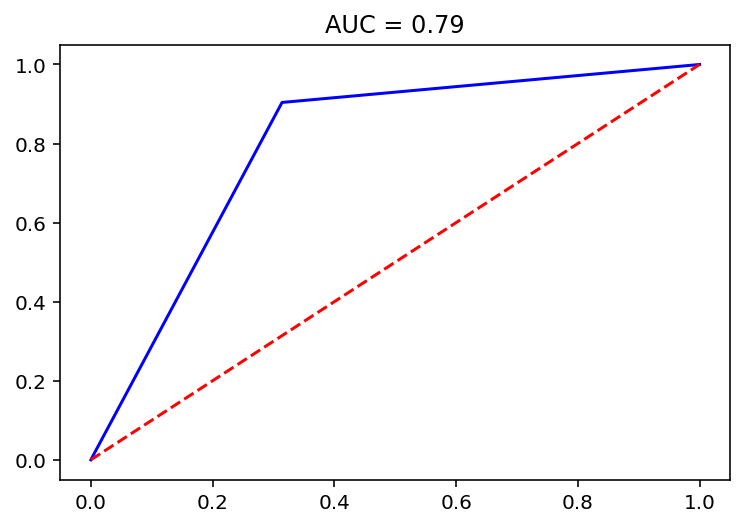

In [35]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

def metricas(y_true, y_pred):
    print(u'La matriz de confusión es ')
    print(confusion_matrix(y_true, y_pred))

    print(u'Precisión (Accuracy):', accuracy_score(y_true, y_pred))
    print(u'Exactitud (Precision):', precision_score(y_true, y_pred))
    print(u'Exhaustividad (Recall):', recall_score(y_true, y_pred))

    false_positive_rate, recall, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(false_positive_rate, recall)

    print(u'AUC:', roc_auc)

    plot(false_positive_rate, recall, 'b')
    plot([0, 1], [0, 1], 'r--')
    title(u'AUC = %0.2f' % roc_auc)
    
print('MÉTRICAS DE ENTRENAMIENTO RANDOM FOREST CLASSIFIER')    
metricas(y_train, dataframe_pred_train['y_pred_train_RFC'])

MÉTRICAS DE TEST RANDOM FOREST CLASSIFIER
La matriz de confusión es 
[[486 253]
 [117 887]]
Precisión (Accuracy): 0.7877223178427998
Exactitud (Precision): 0.7780701754385965
Exhaustividad (Recall): 0.8834661354581673
AUC: 0.770555801152629


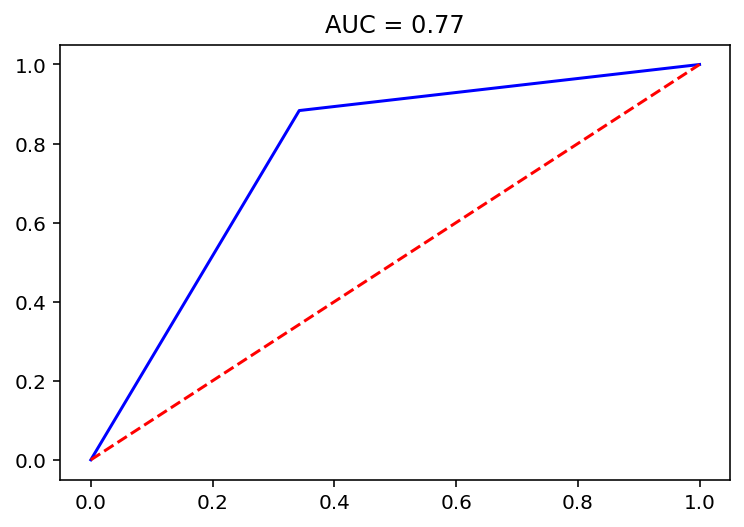

In [36]:
%matplotlib inline
print('MÉTRICAS DE TEST RANDOM FOREST CLASSIFIER')  
metricas(y_test, dataframe_pred_test['y_pred_test_RFC'])

MÉTRICAS DE ENTRENAMIENTO LOGISTIC REGRESSION
La matriz de confusión es 
[[1346  335]
 [ 272 2113]]
Precisión (Accuracy): 0.8507132316773242
Exactitud (Precision): 0.8631535947712419
Exhaustividad (Recall): 0.8859538784067086
AUC: 0.8433338696019265


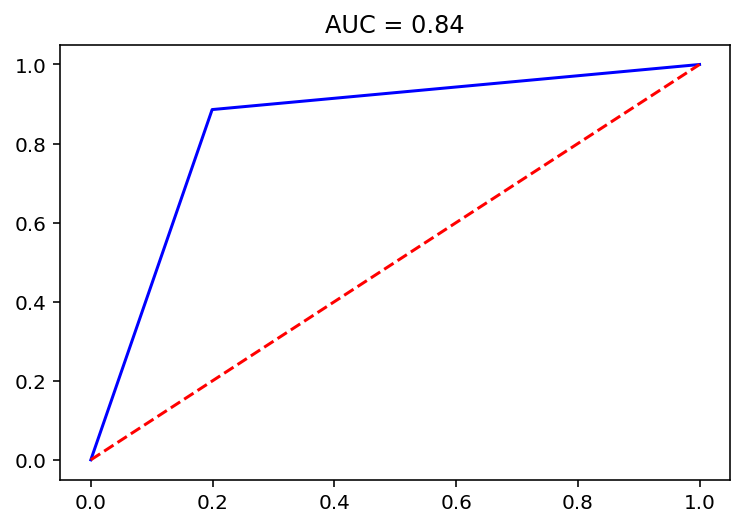

In [37]:
%matplotlib inline
print('MÉTRICAS DE ENTRENAMIENTO LOGISTIC REGRESSION')  
metricas(y_train, dataframe_pred_train['y_pred_train_LR'])

MÉTRICAS DE TEST LOGISTIC REGRESSION
La matriz de confusión es 
[[596 143]
 [125 879]]
Precisión (Accuracy): 0.8462421113023523
Exactitud (Precision): 0.860078277886497
Exhaustividad (Recall): 0.8754980079681275
AUC: 0.840996635919111


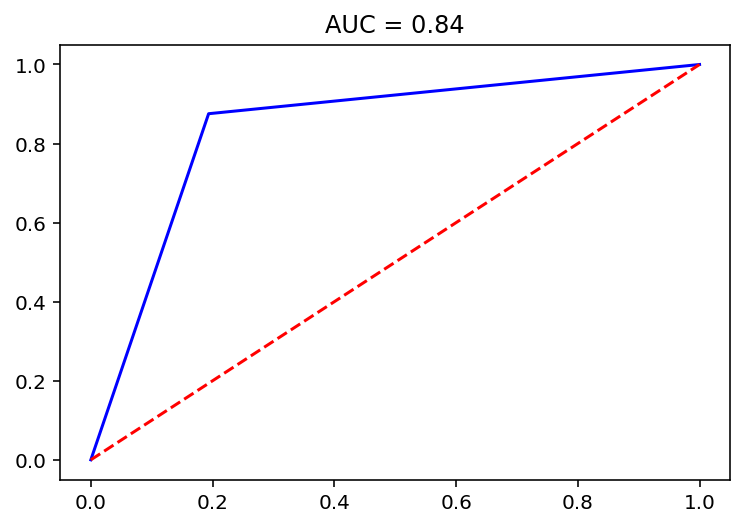

In [38]:
%matplotlib inline
print('MÉTRICAS DE TEST LOGISTIC REGRESSION')  
metricas(y_test, dataframe_pred_test['y_pred_test_LR'])

<module 'matplotlib.pyplot' from 'C:\\Users\\bryan.de.sousa\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

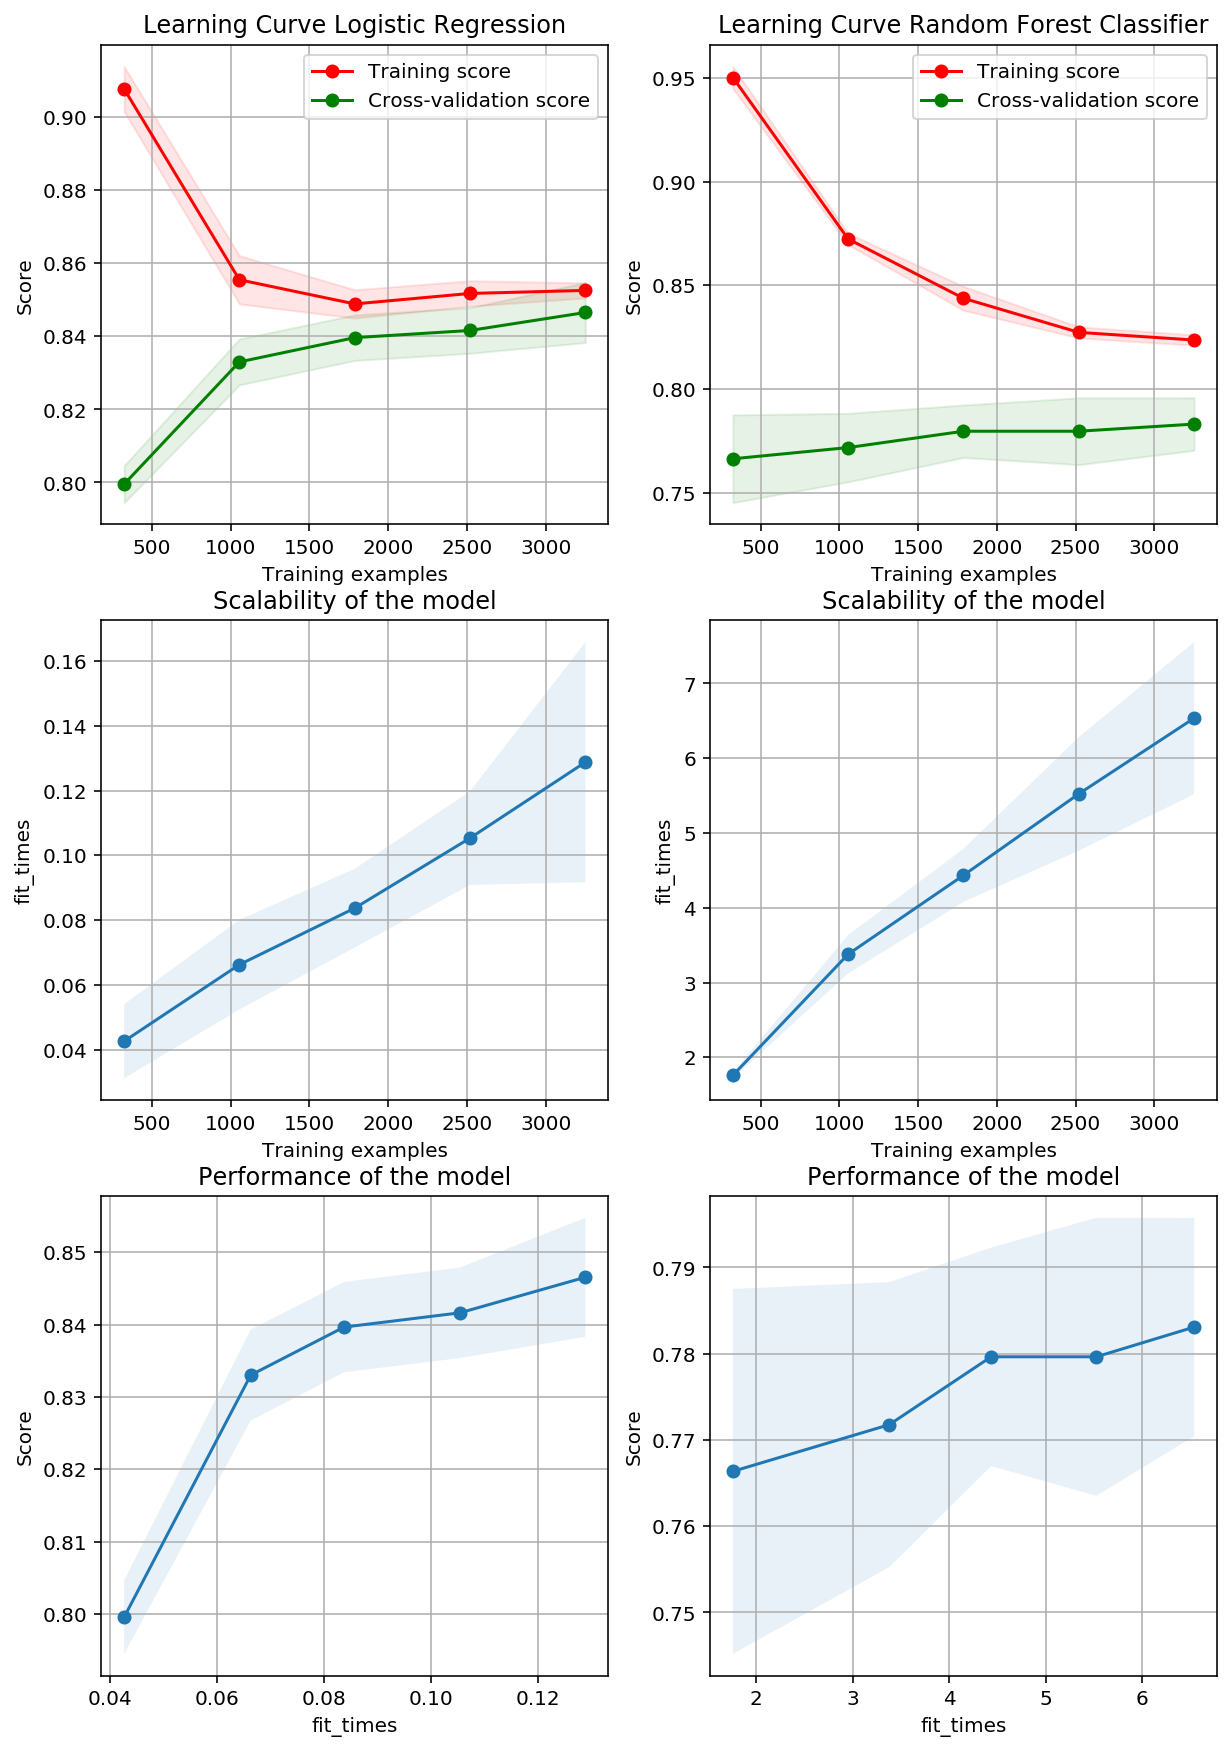

In [39]:
import import_ipynb # pip install import_ipynb
from funciones_modelo import plot_learning_curve

fig, axes = plt.subplots(3, 2, figsize=(10, 15))

plot_learning_curve(axes=axes[:, 0], estimator=model_list["LR"] ,X = x_TRAIN, y = y_train, 
                    n_jobs=-1, cv=5, title="Learning Curve Logistic Regression")


plot_learning_curve(axes=axes[:, 1], estimator=model_list["RFC"] ,X = x_TRAIN, y = y_train, 
                    n_jobs=-1, cv=5, title="Learning Curve Random Forest Classifier")

## Análisis de Curvas de Aprendizaje

Técnicamente las curvas de aprendizaje en el aprendizaje automático son la representación gráfica del rendimiento de generalización del modelo en función del tamaño de los datos de entrenamiento. [--Learning Curves in Machine Learning. Flury & Schmid (1994)--](https://domino.research.ibm.com/library/cyberdig.nsf/papers/491B767CE4518A4585257576006BCD2D/$File/rc24756.pdf)

En otras palabras y en el caso de modelos supervisados (clasificación) las curvas de aprendizaje indican cuánto mejora el modelo (a través del score) a media que se aumenta el tamaño del conjunto de entrenamiento.

La mejora del rendimiento de generalización del modelo implica un costo de oportunidad (trade off) entre el "alto sesgo" del modelo y la "baja varianza" (high bias and low variance).

Cuanto menos sesgado sea un modelo (magnitud del error), mayor será su capacidad para ajustar bien los datos (límite del overfitting en modelos con poco sesgo).

Cuanto mayor es la capacidad del modelo para ajustarse bien a los datos, mayor es la varianza.

La varianza implica una medida de dispersión entre modelos respecto al modelo poblacional, donde, si el cambio de datos de entranamiento implica mayores diferencias de rendimiento del modelo, la varianza se estima elevada, y viceversa.

**El costo de oportunidad se resume en: "cuanto menor es el sesgo, mayor es la varianza"**


![title](img/complejidad_modelo.png)

Como se observa, el gran problema de este trade-off es que ambos terminos generan errores de predicción y en efecto, se debe tratar de minimizarlos.


### Random Forest Classifier:

Observando la distancia entre las dos curvas (train y cross-validation) se determina que el modelo sufre de alta varianza y por ende, bajo sesgo. Entendiendose a su vez que presenta overfitting.

Asimismo, se aprecia que la curva de cross-validation no ha llegado a su máximo, lo que indica que agregar más datos de entrenamiento a este modelo implicaría un mejor desempeño.

Reducir el número de variables dentro del modelo también mejoraría el score dado que reduce la complejidad del modelo, vemos que el sobreajuste del modelo deriva de este exceso de información que el mismo contempla.

A priori, estas recomendaciones conllevan a reducir la varianza y a incrementar el sesgo.


### Logistic Regression:

En sentido contrario del análisis realizado para el modelo anterior. Este modelo sufre de baja varianza y un alto sesgo.

De la misma forma, agregar más datos al conjunto de entrenamiento implicaría un mejor desempeño del mismo, aunque se estima que mejoraría aproximadamente un 1%.

Finalmente, los gráficos de la la segunda fila muestran los tiempos requeridos por los modelos para entrenar con varios tamaños del conjunto de datos de entrenamiento.

Las gráficas en la tercera fila muestran cuánto tiempo se necesitó para entrenar los modelos para cada entrenamiento

Observandose que, el RFC tarda aprox. 200 veces más que el LR.


**Bibliografía:**

[--Learning Curves in Machine Learning. Flury & Schmid (1994)--](https://domino.research.ibm.com/library/cyberdig.nsf/papers/491B767CE4518A4585257576006BCD2D/$File/rc24756.pdf)

[machinelearningmastery.com](https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/)

[dataquest.io](https://www.dataquest.io/blog/learning-curves-machine-learning/)

[IBM Research Report](https://domino.research.ibm.com/library/cyberdig.nsf/papers/491B767CE4518A4585257576006BCD2D/$File/rc24756.pdf)

[sklearn(plot_learning_curve)](#https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html)

## Notas: 

#### Logistic Regression

la inclusion de variables Dummy incrementa la complejidad del modelo, es decir, aumenta la varianza y reduce el sesgo, todo esto sin contribuir con el deteriodo de las métricas de evaluación en test.

#### Random Forest Classifer

El modelo es muy complejo, se ha conseguido mejorar sustancialmente reduciendo la profundidas de los árboles con el parámetro max_depth = 5. Si ninguno (default), los nodos se expanden hasta que todas las hojas sean puras o hasta que todas las hojas contengan menos de min_samples_split samples.